In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sample-sales-data/sales_data_sample.csv


In [2]:
import pandas as pd

# Load the CSV file using latin1 encoding
df = pd.read_csv('/kaggle/input/sample-sales-data/sales_data_sample.csv', encoding='latin1')

# Display the first few rows
df.head()


ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN          Reims   NaN   
2  27 rue du Colonel Pierre Avia           NaN          Paris   NaN   
3             78934 Hillside Dr.           NaN       Pasadena    CA   
4                7734 Strong St.           NaN  San Francisco    CA   

  POSTALCODE COUNTRY TERRITORY CONTACTLASTNAME CONTACTFIRSTNAME DEALSIZE  
0      10022     USA       NaN              Yu             Kwai    Small  
1      51100  France      EMEA         Henriot             Paul    Small  
2      75508  France      EMEA        Da Cunha           Daniel   Medium  
3      90003     USA       NaN           Young            Julie   Medium  
4        NaN     USA       NaN           Brown            Julie   Medium  

[5 rows x 25 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [4]:
df.describe()

ORDERNUMBER  QUANTITYORDERED    PRICEEACH  ORDERLINENUMBER  \
count   2823.000000      2823.000000  2823.000000      2823.000000   
mean   10258.725115        35.092809    83.658544         6.466171   
std       92.085478         9.741443    20.174277         4.225841   
min    10100.000000         6.000000    26.880000         1.000000   
25%    10180.000000        27.000000    68.860000         3.000000   
50%    10262.000000        35.000000    95.700000         6.000000   
75%    10333.500000        43.000000   100.000000         9.000000   
max    10425.000000        97.000000   100.000000        18.000000   

              SALES       QTR_ID     MONTH_ID     YEAR_ID         MSRP  
count   2823.000000  2823.000000  2823.000000  2823.00000  2823.000000  
mean    3553.889072     2.717676     7.092455  2003.81509   100.715551  
std     1841.865106     1.203878     3.656633     0.69967    40.187912  
min      482.130000     1.000000     1.000000  2003.00000    33.000000  
25%     2203.430000     2.000000     4.000000  2003.00000    68.000000  
50%     3184.800000     3.000000     8.000000  2004.00000    99.000000  
75%     4508.000000     4.000000    11.000000  2004.00000   124.000000  
max    14082.800000     4.000000    12.000000  2005.00000   214.000000

In [5]:
# See how many missing values
df.isnull().sum()


ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [6]:
df.shape

(2823, 25)

In [7]:
# Suppose you want to check unique values of 'PRODUCTLINE' column
df['PRODUCTLINE'].unique()


array(['Motorcycles', 'Classic Cars', 'Trucks and Buses', 'Vintage Cars',
       'Planes', 'Ships', 'Trains'], dtype=object)

In [8]:
# Suppose you want to check unique values of 'PRODUCTLINE' column
df['COUNTRY'].unique()

array(['USA', 'France', 'Norway', 'Australia', 'Finland', 'Austria', 'UK',
       'Spain', 'Sweden', 'Singapore', 'Canada', 'Japan', 'Italy',
       'Denmark', 'Belgium', 'Philippines', 'Germany', 'Switzerland',
       'Ireland'], dtype=object)

In [9]:
# Suppose you want to check unique values of 'PRODUCTLINE' column
df['TERRITORY'].unique()

array([nan, 'EMEA', 'APAC', 'Japan'], dtype=object)

In [10]:
# Columns you can drop
drop_cols = [
    'ORDERNUMBER', 'ORDERLINENUMBER', 'PHONE',
    'ADDRESSLINE1', 'ADDRESSLINE2', 'POSTALCODE', 'TERRITORY',
    'CUSTOMERNAME', 'CONTACTLASTNAME', 'STATE', 'CONTACTFIRSTNAME'
]

# Drop these columns
df = df.drop(drop_cols, axis=1)

# Check the cleaned data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   QUANTITYORDERED  2823 non-null   int64  
 1   PRICEEACH        2823 non-null   float64
 2   SALES            2823 non-null   float64
 3   ORDERDATE        2823 non-null   object 
 4   STATUS           2823 non-null   object 
 5   QTR_ID           2823 non-null   int64  
 6   MONTH_ID         2823 non-null   int64  
 7   YEAR_ID          2823 non-null   int64  
 8   PRODUCTLINE      2823 non-null   object 
 9   MSRP             2823 non-null   int64  
 10  PRODUCTCODE      2823 non-null   object 
 11  CITY             2823 non-null   object 
 12  COUNTRY          2823 non-null   object 
 13  DEALSIZE         2823 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 308.9+ KB


In [11]:
# # Convert ORDERDATE to datetime properly
# df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')

# # Now safely extract Year, Month, Day, Weekday
# df['Year'] = df['ORDERDATE'].dt.year
# df['Month'] = df['ORDERDATE'].dt.month
# df['Day'] = df['ORDERDATE'].dt.day
# df['Weekday'] = df['ORDERDATE'].dt.weekday


In [12]:
df.head(20)

QUANTITYORDERED  PRICEEACH    SALES        ORDERDATE   STATUS  QTR_ID  \
0                30      95.70  2871.00   2/24/2003 0:00  Shipped       1   
1                34      81.35  2765.90    5/7/2003 0:00  Shipped       2   
2                41      94.74  3884.34    7/1/2003 0:00  Shipped       3   
3                45      83.26  3746.70   8/25/2003 0:00  Shipped       3   
4                49     100.00  5205.27  10/10/2003 0:00  Shipped       4   
5                36      96.66  3479.76  10/28/2003 0:00  Shipped       4   
6                29      86.13  2497.77  11/11/2003 0:00  Shipped       4   
7                48     100.00  5512.32  11/18/2003 0:00  Shipped       4   
8                22      98.57  2168.54   12/1/2003 0:00  Shipped       4   
9                41     100.00  4708.44   1/15/2004 0:00  Shipped       1   
10               37     100.00  3965.66   2/20/2004 0:00  Shipped       1   
11               23     100.00  2333.12    4/5/2004 0:00  Shipped       2   
12               28     100.00  3188.64   5/18/2004 0:00  Shipped       2   
13               34     100.00  3676.76   6/28/2004 0:00  Shipped       2   
14               45      92.83  4177.35   7/23/2004 0:00  Shipped       3   
15               36     100.00  4099.68   8/27/2004 0:00  Shipped       3   
16               23     100.00  2597.39   9/30/2004 0:00  Shipped       3   
17               41     100.00  4394.38  10/15/2004 0:00  Shipped       4   
18               46      94.74  4358.04   11/2/2004 0:00  Shipped       4   
19               42     100.00  4396.14  11/15/2004 0:00  Shipped       4   

    MONTH_ID  YEAR_ID  PRODUCTLINE  MSRP PRODUCTCODE           CITY  \
0          2     2003  Motorcycles    95    S10_1678            NYC   
1          5     2003  Motorcycles    95    S10_1678          Reims   
2          7     2003  Motorcycles    95    S10_1678          Paris   
3          8     2003  Motorcycles    95    S10_1678       Pasadena   
4         10     2003  Motorcycles    95    S10_1678  San Francisco   
5         10     2003  Motorcycles    95    S10_1678     Burlingame   
6         11     2003  Motorcycles    95    S10_1678          Lille   
7         11     2003  Motorcycles    95    S10_1678         Bergen   
8         12     2003  Motorcycles    95    S10_1678  San Francisco   
9          1     2004  Motorcycles    95    S10_1678          Paris   
10         2     2004  Motorcycles    95    S10_1678      Melbourne   
11         4     2004  Motorcycles    95    S10_1678            NYC   
12         5     2004  Motorcycles    95    S10_1678         Newark   
13         6     2004  Motorcycles    95    S10_1678    Bridgewater   
14         7     2004  Motorcycles    95    S10_1678         Nantes   
15         8     2004  Motorcycles    95    S10_1678      Cambridge   
16         9     2004  Motorcycles    95    S10_1678       Helsinki   
17        10     2004  Motorcycles    95    S10_1678        Stavern   
18        11     2004  Motorcycles    95    S10_1678      Allentown   
19        11     2004  Motorcycles    95    S10_1678            NYC   

      COUNTRY DEALSIZE  
0         USA    Small  
1      France    Small  
2      France   Medium  
3         USA   Medium  
4         USA   Medium  
5         USA   Medium  
6      France    Small  
7      Norway   Medium  
8         USA    Small  
9      France   Medium  
10  Australia   Medium  
11        USA    Small  
12        USA   Medium  
13        USA   Medium  
14     France   Medium  
15        USA   Medium  
16    Finland    Small  
17     Norway   Medium  
18        USA   Medium  
19        USA   Medium

In [13]:
# Drop unnecessary columns
df = df.drop(['MONTH_ID', 'YEAR_ID', 'QTR_ID', 'PRODUCTCODE',], axis=1)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   QUANTITYORDERED  2823 non-null   int64  
 1   PRICEEACH        2823 non-null   float64
 2   SALES            2823 non-null   float64
 3   ORDERDATE        2823 non-null   object 
 4   STATUS           2823 non-null   object 
 5   PRODUCTLINE      2823 non-null   object 
 6   MSRP             2823 non-null   int64  
 7   CITY             2823 non-null   object 
 8   COUNTRY          2823 non-null   object 
 9   DEALSIZE         2823 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 220.7+ KB


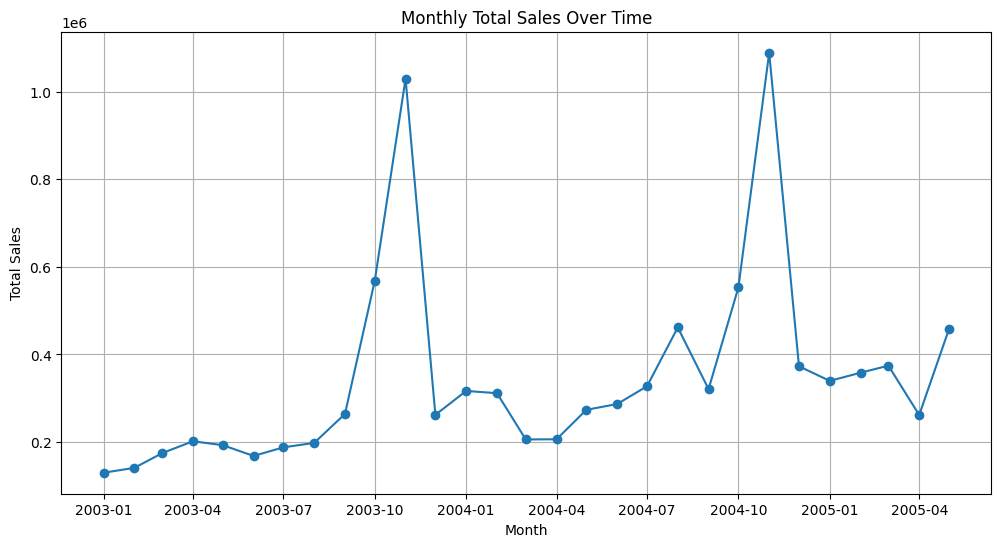

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Make sure ORDERDATE is datetime
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')

# 2. Create Month column
df['Month'] = df['ORDERDATE'].dt.to_period('M')

# 3. Group sales by Month
monthly_sales = df.groupby('Month').agg({'SALES':'sum'}).reset_index()

# 4. Convert Month back to timestamp for plotting
monthly_sales['Month'] = monthly_sales['Month'].dt.to_timestamp()

# 5. Plot properly
plt.figure(figsize=(12,6))
plt.plot(monthly_sales['Month'], monthly_sales['SALES'], marker='o', linestyle='-')
plt.title('Monthly Total Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


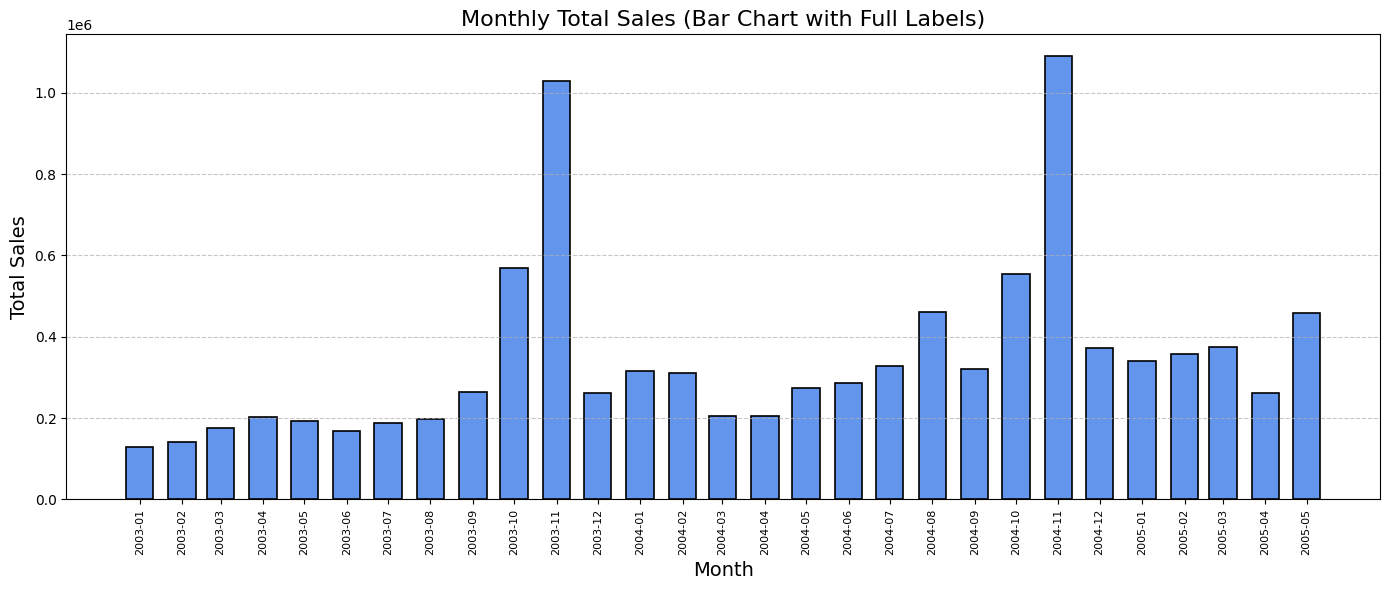

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))

# Create colorful wide bars
plt.bar(monthly_sales['Month'], monthly_sales['SALES'], 
        width=20, 
        color='cornflowerblue', 
        edgecolor='black', 
        linewidth=1.2)

# Title and labels
plt.title('Monthly Total Sales (Bar Chart with Full Labels)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)

# Manually set every Month as x-tick
plt.xticks(monthly_sales['Month'], 
           [d.strftime('%Y-%m') for d in monthly_sales['Month']],  # format like "2003-01"
           rotation=90, ha='center', fontsize=8)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   QUANTITYORDERED  2823 non-null   int64         
 1   PRICEEACH        2823 non-null   float64       
 2   SALES            2823 non-null   float64       
 3   ORDERDATE        2823 non-null   datetime64[ns]
 4   STATUS           2823 non-null   object        
 5   PRODUCTLINE      2823 non-null   object        
 6   MSRP             2823 non-null   int64         
 7   CITY             2823 non-null   object        
 8   COUNTRY          2823 non-null   object        
 9   DEALSIZE         2823 non-null   object        
 10  Month            2823 non-null   period[M]     
dtypes: datetime64[ns](1), float64(2), int64(2), object(5), period[M](1)
memory usage: 242.7+ KB


In [18]:
# Suppose you want to check unique values of 'PRODUCTLINE' column
df['STATUS'].unique()

array(['Shipped', 'Disputed', 'In Process', 'Cancelled', 'On Hold',
       'Resolved'], dtype=object)

In [19]:
# Suppose you want to check unique values of 'PRODUCTLINE' column
df['CITY'].unique()

array(['NYC', 'Reims', 'Paris', 'Pasadena', 'San Francisco', 'Burlingame',
       'Lille', 'Bergen', 'Melbourne', 'Newark', 'Bridgewater', 'Nantes',
       'Cambridge', 'Helsinki', 'Stavern', 'Allentown', 'Salzburg',
       'Chatswood', 'New Bedford', 'Liverpool', 'Madrid', 'Lule',
       'Singapore', 'South Brisbane', 'Philadelphia', 'Lyon', 'Vancouver',
       'Burbank', 'New Haven', 'Minato-ku', 'Torino', 'Boras',
       'Versailles', 'San Rafael', 'Nashua', 'Brickhaven', 'North Sydney',
       'Montreal', 'Osaka', 'White Plains', 'Kobenhavn', 'London',
       'Toulouse', 'Barcelona', 'Los Angeles', 'San Diego', 'Bruxelles',
       'Tsawassen', 'Boston', 'Cowes', 'Oulu', 'San Jose', 'Graz',
       'Makati City', 'Marseille', 'Koln', 'Gensve', 'Reggio Emilia',
       'Frankfurt', 'Espoo', 'Dublin', 'Manchester', 'Aaarhus',
       'Glendale', 'Sevilla', 'Brisbane', 'Strasbourg', 'Las Vegas',
       'Oslo', 'Bergamo', 'Glen Waverly', 'Munich', 'Charleroi'],
      dtype=object)

In [20]:
# Suppose you want to check unique values of 'PRODUCTLINE' column
df['COUNTRY'].unique()

array(['USA', 'France', 'Norway', 'Australia', 'Finland', 'Austria', 'UK',
       'Spain', 'Sweden', 'Singapore', 'Canada', 'Japan', 'Italy',
       'Denmark', 'Belgium', 'Philippines', 'Germany', 'Switzerland',
       'Ireland'], dtype=object)

In [21]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 1. Label Encode CITY
le = LabelEncoder()
df['CITY_encoded'] = le.fit_transform(df['CITY'])

# 2. One-Hot Encode COUNTRY, STATUS, DEALSIZE, PRODUCTLINE
df = pd.get_dummies(df, columns=['COUNTRY', 'STATUS', 'DEALSIZE', 'PRODUCTLINE'], prefix=['COUNTRY', 'STATUS', 'DEALSIZE', 'PRODUCTLINE'])

# (Optional) Drop the original CITY column after encoding if you don't need it
df = df.drop('CITY', axis=1)

# 3. Done! Your df is now ready
print(df.head())


   QUANTITYORDERED  PRICEEACH    SALES  ORDERDATE  MSRP    Month  \
0               30      95.70  2871.00 2003-02-24    95  2003-02   
1               34      81.35  2765.90 2003-05-07    95  2003-05   
2               41      94.74  3884.34 2003-07-01    95  2003-07   
3               45      83.26  3746.70 2003-08-25    95  2003-08   
4               49     100.00  5205.27 2003-10-10    95  2003-10   

   CITY_encoded  COUNTRY_Australia  COUNTRY_Austria  COUNTRY_Belgium  ...  \
0            42              False            False            False  ...   
1            56              False            False            False  ...   
2            52              False            False            False  ...   
3            53              False            False            False  ...   
4            59              False            False            False  ...   

   DEALSIZE_Large  DEALSIZE_Medium  DEALSIZE_Small  PRODUCTLINE_Classic Cars  \
0           False            False            Tr

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   QUANTITYORDERED               2823 non-null   int64         
 1   PRICEEACH                     2823 non-null   float64       
 2   SALES                         2823 non-null   float64       
 3   ORDERDATE                     2823 non-null   datetime64[ns]
 4   MSRP                          2823 non-null   int64         
 5   Month                         2823 non-null   period[M]     
 6   CITY_encoded                  2823 non-null   int64         
 7   COUNTRY_Australia             2823 non-null   bool          
 8   COUNTRY_Austria               2823 non-null   bool          
 9   COUNTRY_Belgium               2823 non-null   bool          
 10  COUNTRY_Canada                2823 non-null   bool          
 11  COUNTRY_Denmark               

In [23]:
df.head(10)

QUANTITYORDERED  PRICEEACH    SALES  ORDERDATE  MSRP    Month  \
0               30      95.70  2871.00 2003-02-24    95  2003-02   
1               34      81.35  2765.90 2003-05-07    95  2003-05   
2               41      94.74  3884.34 2003-07-01    95  2003-07   
3               45      83.26  3746.70 2003-08-25    95  2003-08   
4               49     100.00  5205.27 2003-10-10    95  2003-10   
5               36      96.66  3479.76 2003-10-28    95  2003-10   
6               29      86.13  2497.77 2003-11-11    95  2003-11   
7               48     100.00  5512.32 2003-11-18    95  2003-11   
8               22      98.57  2168.54 2003-12-01    95  2003-12   
9               41     100.00  4708.44 2004-01-15    95  2004-01   

   CITY_encoded  COUNTRY_Australia  COUNTRY_Austria  COUNTRY_Belgium  ...  \
0            42              False            False            False  ...   
1            56              False            False            False  ...   
2            52              False            False            False  ...   
3            53              False            False            False  ...   
4            59              False            False            False  ...   
5            12              False            False            False  ...   
6            28              False            False            False  ...   
7             4              False            False            False  ...   
8            59              False            False            False  ...   
9            52              False            False            False  ...   

   DEALSIZE_Large  DEALSIZE_Medium  DEALSIZE_Small  PRODUCTLINE_Classic Cars  \
0           False            False            True                     False   
1           False            False            True                     False   
2           False             True           False                     False   
3           False             True           False                     False   
4           False             True           False                     False   
5           False             True           False                     False   
6           False            False            True                     False   
7           False             True           False                     False   
8           False            False            True                     False   
9           False             True           False                     False   

   PRODUCTLINE_Motorcycles  PRODUCTLINE_Planes  PRODUCTLINE_Ships  \
0                     True               False              False   
1                     True               False              False   
2                     True               False              False   
3                     True               False              False   
4                     True               False              False   
5                     True               False              False   
6                     True               False              False   
7                     True               False              False   
8                     True               False              False   
9                     True               False              False   

   PRODUCTLINE_Trains  PRODUCTLINE_Trucks and Buses  PRODUCTLINE_Vintage Cars  
0               False                         False                     False  
1               False                         False                     False  
2               False                         False                     False  
3               False                         False                     False  
4               False                         False                     False  
5               False                         False                     False  
6               False                         False                     False  
7               False                         False                     False  
8               False                        

In [24]:
# 1. Convert all bool columns to int
for col in df.select_dtypes(include='bool').columns:
    df[col] = df[col].astype(int)

In [25]:
# 2. Fix Month column
df['Month'] = df['Month'].dt.to_timestamp()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   QUANTITYORDERED               2823 non-null   int64         
 1   PRICEEACH                     2823 non-null   float64       
 2   SALES                         2823 non-null   float64       
 3   ORDERDATE                     2823 non-null   datetime64[ns]
 4   MSRP                          2823 non-null   int64         
 5   Month                         2823 non-null   datetime64[ns]
 6   CITY_encoded                  2823 non-null   int64         
 7   COUNTRY_Australia             2823 non-null   int64         
 8   COUNTRY_Austria               2823 non-null   int64         
 9   COUNTRY_Belgium               2823 non-null   int64         
 10  COUNTRY_Canada                2823 non-null   int64         
 11  COUNTRY_Denmark               

/tmp/ipykernel_31/952562117.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='ORDERDATE').agg({'SALES':'sum'})


<Axes: title={'center': 'Monthly Sales Trend'}, xlabel='ORDERDATE'>

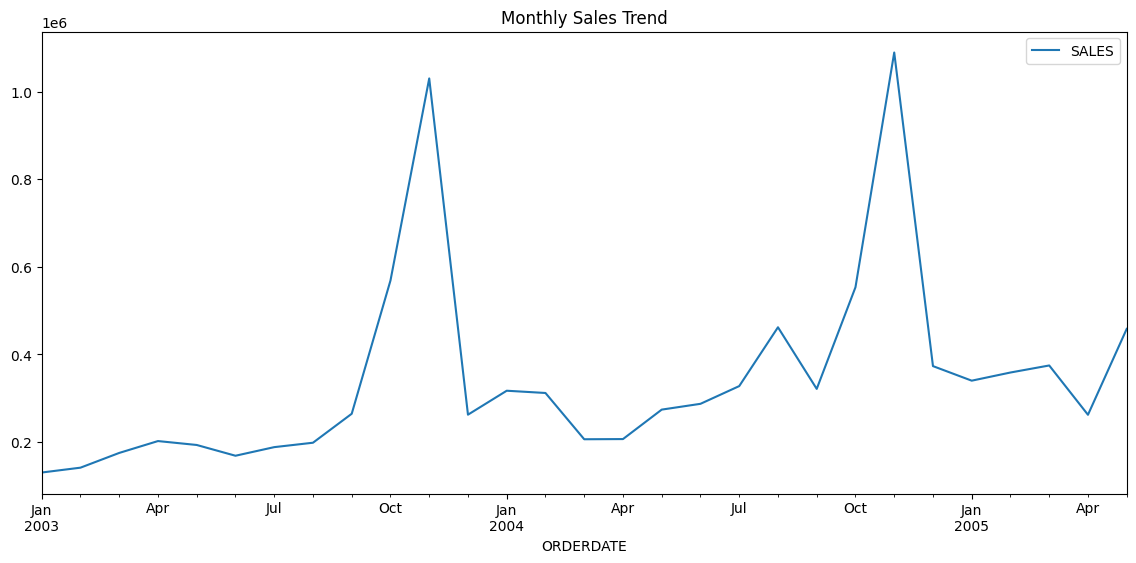

In [27]:
monthly_sales = df.resample('M', on='ORDERDATE').agg({'SALES':'sum'})
monthly_sales.plot(figsize=(14,6), title='Monthly Sales Trend')


<Axes: title={'center': 'Sales by Product Line'}>

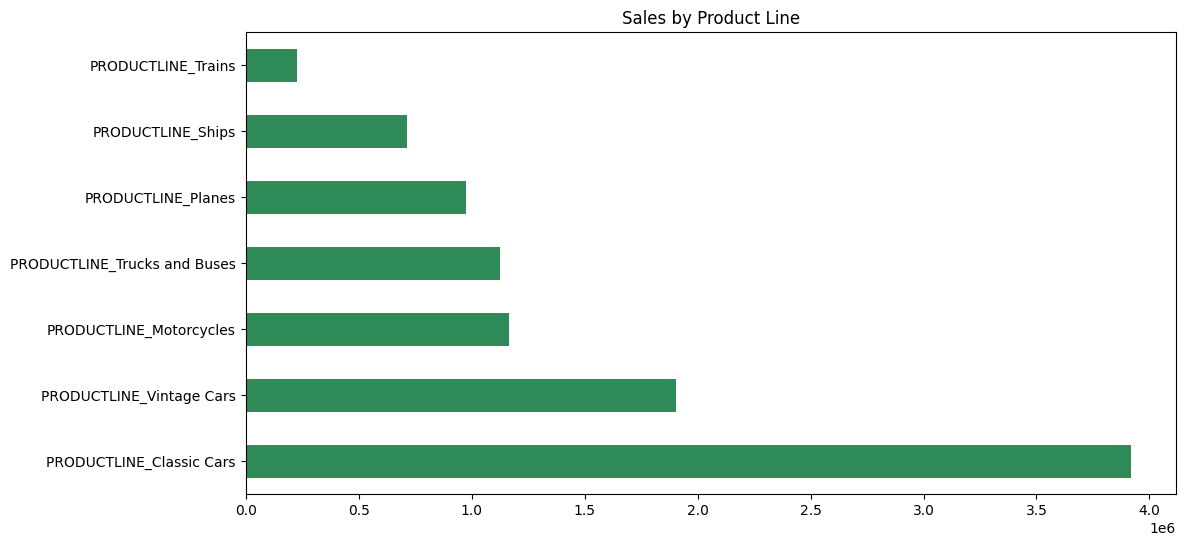

In [28]:
productline_sales = df[[col for col in df.columns if 'PRODUCTLINE_' in col]].multiply(df['SALES'], axis=0)
productline_sales = productline_sales.sum().sort_values(ascending=False)

productline_sales.plot(kind='barh', figsize=(12,6), color='seagreen', title='Sales by Product Line')


<Axes: title={'center': 'Sales by Country'}>

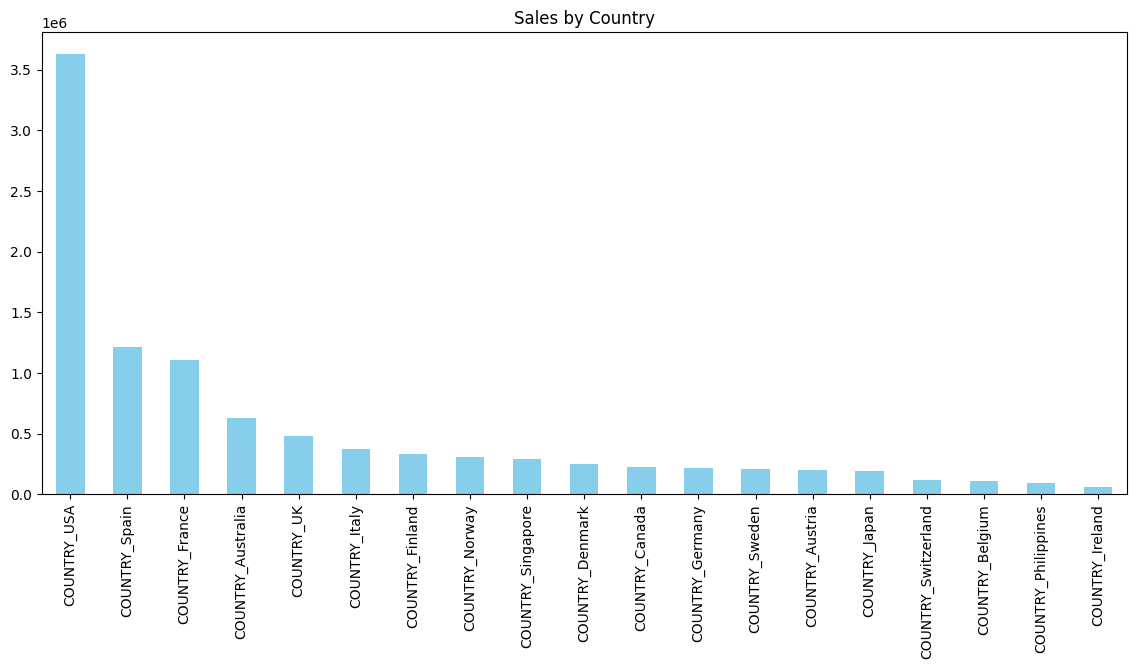

In [29]:
country_sales = df[[col for col in df.columns if 'COUNTRY_' in col]].multiply(df['SALES'], axis=0)
country_sales = country_sales.sum().sort_values(ascending=False)

country_sales.plot(kind='bar', figsize=(14,6), color='skyblue', title='Sales by Country')


<Axes: title={'center': 'Sales by Deal Size'}>

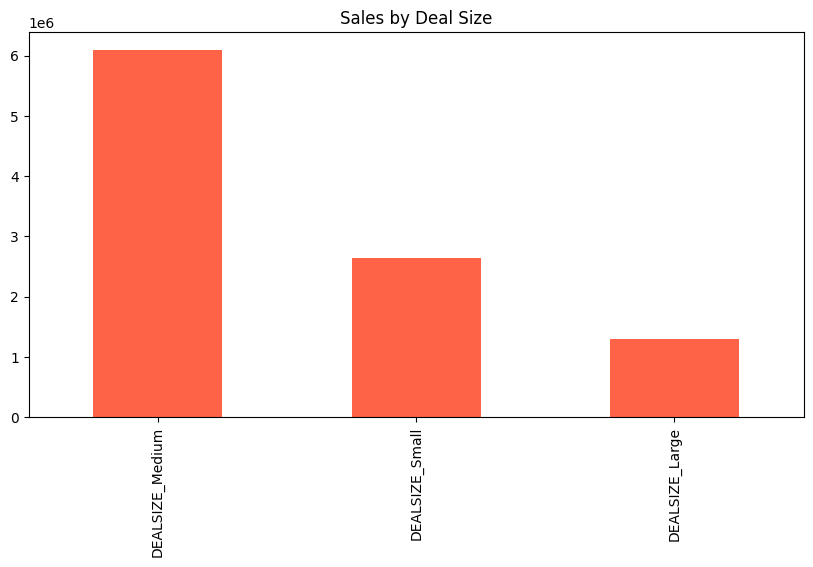

In [30]:
deal_sales = df[[col for col in df.columns if 'DEALSIZE_' in col]].multiply(df['SALES'], axis=0)
deal_sales = deal_sales.sum().sort_values(ascending=False)

deal_sales.plot(kind='bar', figsize=(10,5), color='tomato', title='Sales by Deal Size')


<Axes: title={'center': 'Monthly Total Sales'}, xlabel='ORDERDATE'>

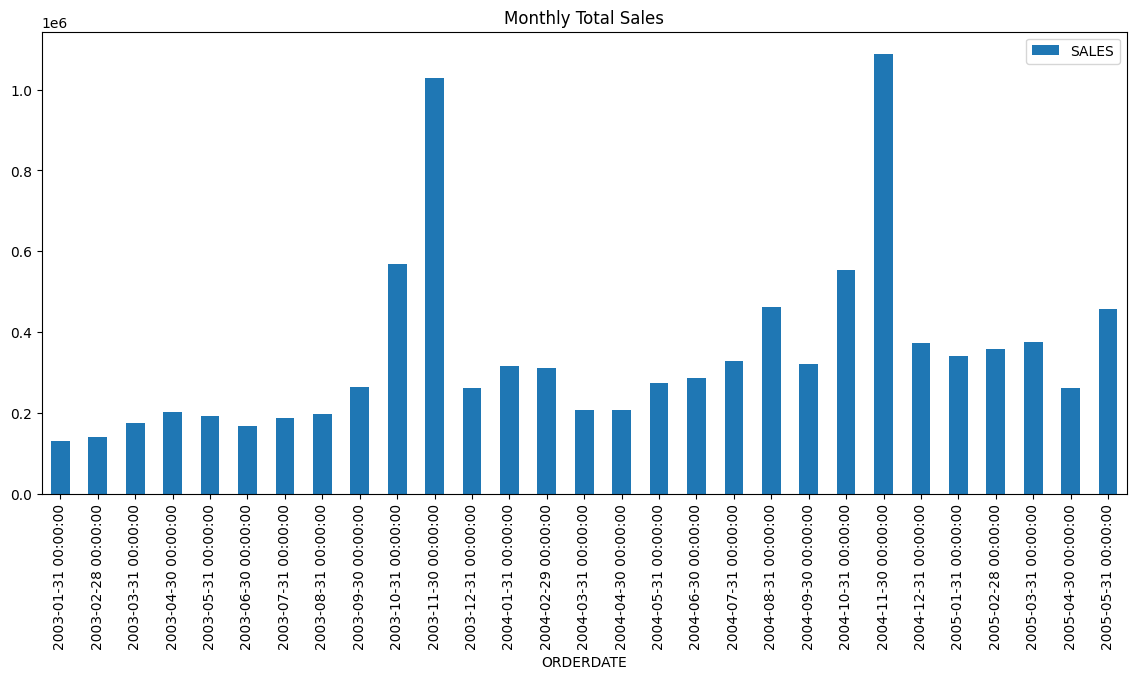

In [31]:
monthly_sales.plot(kind='bar', figsize=(14,6), title='Monthly Total Sales')


/tmp/ipykernel_31/1413152966.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_sales = df.resample('Q', on='ORDERDATE').agg({'SALES':'sum'})


<Axes: title={'center': 'Quarterly Sales Trend'}, xlabel='ORDERDATE'>

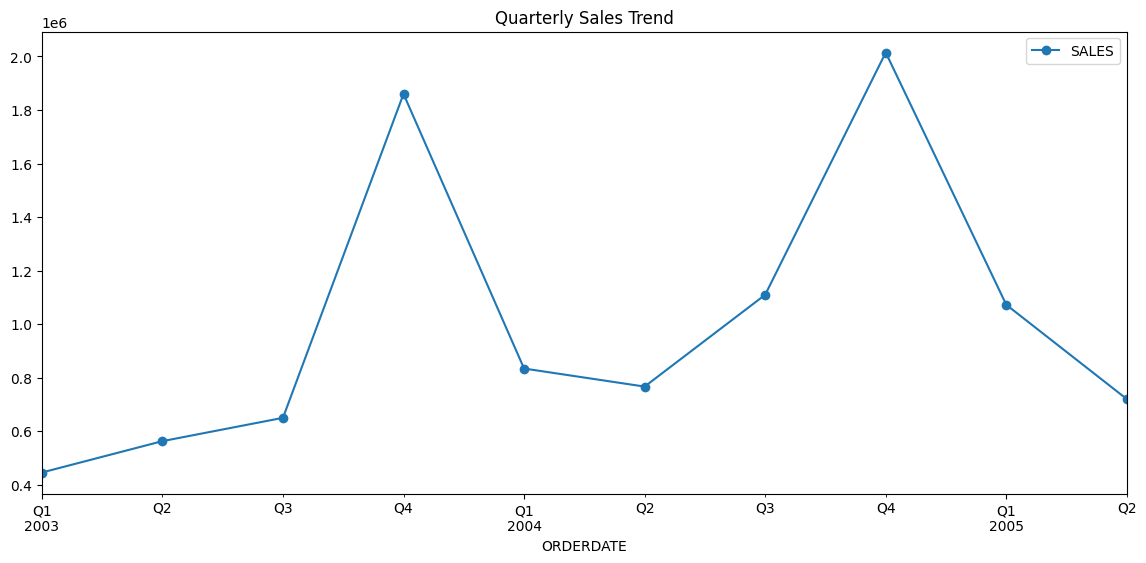

In [32]:
quarterly_sales = df.resample('Q', on='ORDERDATE').agg({'SALES':'sum'})
quarterly_sales.plot(figsize=(14,6), marker='o', title='Quarterly Sales Trend')


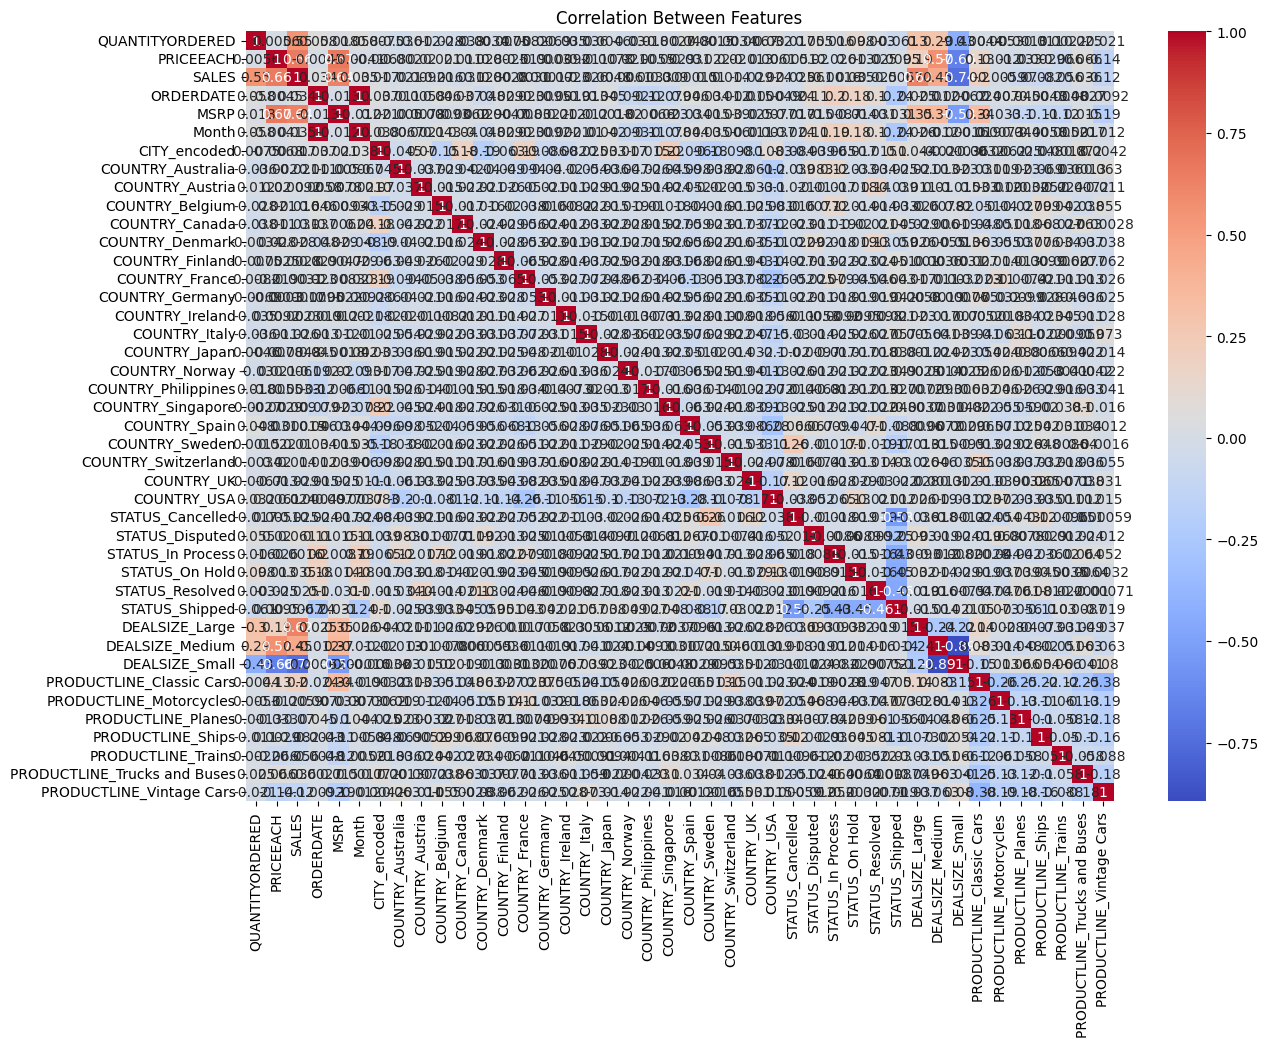

In [33]:
import seaborn as sns

plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Features')
plt.show()


In [34]:
#  Resample Monthly
monthly_sales = df.resample('MS', on='ORDERDATE').agg({'SALES':'sum'}).reset_index()

#  Create Time Features
monthly_sales['Month_Num'] = monthly_sales['ORDERDATE'].dt.month
monthly_sales['Quarter'] = monthly_sales['ORDERDATE'].dt.quarter
monthly_sales['Year'] = monthly_sales['ORDERDATE'].dt.year

In [35]:
#  Create Lag Features
monthly_sales['Sales_Lag_1'] = monthly_sales['SALES'].shift(1)
monthly_sales['Sales_Lag_2'] = monthly_sales['SALES'].shift(2)
monthly_sales['Sales_Lag_3'] = monthly_sales['SALES'].shift(3)
monthly_sales['Sales_Lag_6'] = monthly_sales['SALES'].shift(6)

In [36]:
# Create Rolling Features
monthly_sales['Sales_Rolling3'] = monthly_sales['SALES'].rolling(window=3).mean()
monthly_sales['Sales_Rolling6'] = monthly_sales['SALES'].rolling(window=6).mean()
monthly_sales['Sales_Rolling12'] = monthly_sales['SALES'].rolling(window=12).mean()

In [37]:
# Create Difference Feature
monthly_sales['Sales_Diff'] = monthly_sales['SALES'].diff()

In [38]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   QUANTITYORDERED               2823 non-null   int64         
 1   PRICEEACH                     2823 non-null   float64       
 2   SALES                         2823 non-null   float64       
 3   ORDERDATE                     2823 non-null   datetime64[ns]
 4   MSRP                          2823 non-null   int64         
 5   Month                         2823 non-null   datetime64[ns]
 6   CITY_encoded                  2823 non-null   int64         
 7   COUNTRY_Australia             2823 non-null   int64         
 8   COUNTRY_Austria               2823 non-null   int64         
 9   COUNTRY_Belgium               2823 non-null   int64         
 10  COUNTRY_Canada                2823 non-null   int64         
 11  COUNTRY_Denmark               

In [39]:
df.shape

(2823, 42)

In [40]:
df.head(10)

QUANTITYORDERED  PRICEEACH    SALES  ORDERDATE  MSRP      Month  \
0               30      95.70  2871.00 2003-02-24    95 2003-02-01   
1               34      81.35  2765.90 2003-05-07    95 2003-05-01   
2               41      94.74  3884.34 2003-07-01    95 2003-07-01   
3               45      83.26  3746.70 2003-08-25    95 2003-08-01   
4               49     100.00  5205.27 2003-10-10    95 2003-10-01   
5               36      96.66  3479.76 2003-10-28    95 2003-10-01   
6               29      86.13  2497.77 2003-11-11    95 2003-11-01   
7               48     100.00  5512.32 2003-11-18    95 2003-11-01   
8               22      98.57  2168.54 2003-12-01    95 2003-12-01   
9               41     100.00  4708.44 2004-01-15    95 2004-01-01   

   CITY_encoded  COUNTRY_Australia  COUNTRY_Austria  COUNTRY_Belgium  ...  \
0            42                  0                0                0  ...   
1            56                  0                0                0  ...   
2            52                  0                0                0  ...   
3            53                  0                0                0  ...   
4            59                  0                0                0  ...   
5            12                  0                0                0  ...   
6            28                  0                0                0  ...   
7             4                  0                0                0  ...   
8            59                  0                0                0  ...   
9            52                  0                0                0  ...   

   DEALSIZE_Large  DEALSIZE_Medium  DEALSIZE_Small  PRODUCTLINE_Classic Cars  \
0               0                0               1                         0   
1               0                0               1                         0   
2               0                1               0                         0   
3               0                1               0                         0   
4               0                1               0                         0   
5               0                1               0                         0   
6               0                0               1                         0   
7               0                1               0                         0   
8               0                0               1                         0   
9               0                1               0                         0   

   PRODUCTLINE_Motorcycles  PRODUCTLINE_Planes  PRODUCTLINE_Ships  \
0                        1                   0                  0   
1                        1                   0                  0   
2                        1                   0                  0   
3                        1                   0                  0   
4                        1                   0                  0   
5                        1                   0                  0   
6                        1                   0                  0   
7                        1                   0                  0   
8                        1                   0                  0   
9                        1                   0                  0   

   PRODUCTLINE_Trains  PRODUCTLINE_Trucks and Buses  PRODUCTLINE_Vintage Cars  
0                   0                             0                         0  
1                   0                             0                         0  
2                   0                             0                         0  
3                   0                             0                         0  
4                   0                             0                         0  
5                   0                             0                         0  
6                   0                             0                         0  
7                   0                             0                         0  
8                   0  

In [41]:
#  Drop NaN (because of shift and rolling)
monthly_sales = monthly_sales.dropna().reset_index(drop=True)

In [42]:
# Step 3: Define Features and Target
feature_cols = [
    'Month_Num', 'Quarter', 'Year',
    'Sales_Lag_1', 'Sales_Lag_2', 'Sales_Lag_3', 'Sales_Lag_6',
    'Sales_Rolling3', 'Sales_Rolling6', 'Sales_Rolling12',
    'Sales_Diff'
]
X = monthly_sales[feature_cols]
y = monthly_sales['SALES']


# IMPORTS AND EVALUATION SETUP

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

#️ Evaluation helper

In [44]:
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return mae, rmse

# Predict, plot, and forecast helper

In [69]:
def predict_and_plot(model, X_train, y_train, X_test, y_test, monthly_sales, feature_cols, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae, rmse = evaluate_model(y_test, y_pred)
    print(f"✅ {model_name} - MAE: {mae:.2f}, RMSE: {rmse:.2f}")

    # ======================
    # MONTHLY FORECAST BLOCK
    # ======================
    future_dates = pd.date_range(
        start=monthly_sales['ORDERDATE'].max() + pd.DateOffset(months=1),
        periods=3,
        freq='MS'
    )
    last_row = monthly_sales.iloc[-1].copy()

    future_data = []
    for date in future_dates:
        next_row = {
            'Month_Num': date.month,
            'Quarter': (date.month - 1) // 3 + 1,
            'Year': date.year,
            'Sales_Lag_1': last_row['SALES'],
            'Sales_Lag_2': last_row['Sales_Lag_1'],
            'Sales_Lag_3': last_row['Sales_Lag_2'],
            'Sales_Lag_6': last_row['Sales_Lag_3'],
            'Sales_Rolling3': np.mean([last_row['SALES'], last_row['Sales_Lag_1'], last_row['Sales_Lag_2']]),
            'Sales_Rolling6': last_row['Sales_Rolling6'],
            'Sales_Rolling12': last_row['Sales_Rolling12'],
            'Sales_Diff': last_row['SALES'] - last_row['Sales_Lag_1']
        }
        future_data.append(next_row)
        last_row['Sales_Lag_3'] = last_row['Sales_Lag_2']
        last_row['Sales_Lag_2'] = last_row['Sales_Lag_1']
        last_row['Sales_Lag_1'] = model.predict(pd.DataFrame([next_row]))[0]
        last_row['SALES'] = last_row['Sales_Lag_1']

    future_df = pd.DataFrame(future_data)
    future_sales_pred = model.predict(future_df)

    history = monthly_sales[['ORDERDATE', 'SALES']].copy()

    plt.figure(figsize=(12, 6))
    plt.plot(history['ORDERDATE'], history['SALES'], label='Historical (Monthly)', marker='o')
    plt.plot(future_dates, future_sales_pred, label='Forecasted (Monthly)', marker='x', linestyle='--')

    for date, pred in zip(future_dates, future_sales_pred):
        plt.scatter(date, pred, color='red', s=50, zorder=5)
        plt.text(date, pred, f'{pred:.0f}', ha='center', va='bottom', fontsize=9, color='red')

    plt.title(f"Monthly Forecast with {model_name}")
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # ====================
    # DAILY FORECAST BLOCK
    # ====================
    daily_dates = pd.date_range(
        start=monthly_sales['ORDERDATE'].max() + pd.DateOffset(days=1),
        periods=30,
        freq='D'
    )

    # Resample monthly_sales to daily
    daily_sales = monthly_sales.set_index('ORDERDATE').resample('D').interpolate().reset_index()
    last_row = daily_sales.iloc[-1].copy()

    daily_data = []
    for date in daily_dates:
        next_row = {
            'Month_Num': date.month,
            'Quarter': (date.month - 1) // 3 + 1,
            'Year': date.year,
            'Sales_Lag_1': last_row['SALES'],
            'Sales_Lag_2': last_row['Sales_Lag_1'],
            'Sales_Lag_3': last_row['Sales_Lag_2'],
            'Sales_Lag_6': last_row['Sales_Lag_3'],
            'Sales_Rolling3': np.mean([last_row['SALES'], last_row['Sales_Lag_1'], last_row['Sales_Lag_2']]),
            'Sales_Rolling6': last_row['Sales_Rolling6'],
            'Sales_Rolling12': last_row['Sales_Rolling12'],
            'Sales_Diff': last_row['SALES'] - last_row['Sales_Lag_1']
        }
        daily_data.append(next_row)
        last_row['Sales_Lag_3'] = last_row['Sales_Lag_2']
        last_row['Sales_Lag_2'] = last_row['Sales_Lag_1']
        last_row['Sales_Lag_1'] = model.predict(pd.DataFrame([next_row]))[0]
        last_row['SALES'] = last_row['Sales_Lag_1']

    daily_df = pd.DataFrame(daily_data)
    daily_sales_pred = model.predict(daily_df)

    plt.figure(figsize=(12, 6))
    plt.plot(daily_sales['ORDERDATE'], daily_sales['SALES'], label='Historical (Daily)', marker='o')
    plt.plot(daily_dates, daily_sales_pred, label='Forecasted (Daily)', marker='x', linestyle='--')

    for date, pred in zip(daily_dates, daily_sales_pred):
        plt.scatter(date, pred, color='green', s=50, zorder=5)
        plt.text(date, pred, f'{pred:.0f}', ha='center', va='bottom', fontsize=9, color='green')

    plt.title(f"Daily Forecast with {model_name}")
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Future prediction (next 3 months)

 # Optimize XGBoost

In [70]:
def optimize_xgboost(X_train, y_train):
    param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    }
    model = XGBRegressor(random_state=42)
    grid = GridSearchCV(model, param_grid, scoring='neg_mean_absolute_error', cv=3, verbose=2, n_jobs=-1)
    grid.fit(X_train, y_train)
    print("✅ Best XGBoost Params:", grid.best_params_)
    return grid.best_estimator_

# Optimize CatBoost

In [71]:
def optimize_catboost(X_train, y_train):
    param_grid = {
        'iterations': [300, 500, 700],
        'learning_rate': [0.01, 0.05, 0.1],
        'depth': [4, 6, 8],
        'l2_leaf_reg': [1, 3, 5, 7],
        'border_count': [32, 64, 128]
    }
    model = CatBoostRegressor(random_state=42, verbose=0)
    search = RandomizedSearchCV(model, param_grid, scoring='neg_mean_absolute_error', cv=3, n_iter=20, verbose=2, random_state=42, n_jobs=-1)
    search.fit(X_train, y_train)
    print("✅ Best CatBoost Params:", search.best_params_)
    return search.best_estimator_

# Product line forecasting

In [72]:
def forecast_productline(df, productline_name):
    print(f"\n📈 Forecasting for: {productline_name}")
    onehot_col = f'PRODUCTLINE_{productline_name}'
    df_product = df[df[onehot_col] == True]
    monthly_sales = df_product.resample('MS', on='ORDERDATE').agg({'SALES':'sum'}).reset_index()
    monthly_sales['Month_Num'] = monthly_sales['ORDERDATE'].dt.month
    monthly_sales['Quarter'] = monthly_sales['ORDERDATE'].dt.quarter
    monthly_sales['Year'] = monthly_sales['ORDERDATE'].dt.year
    monthly_sales['Sales_Lag_1'] = monthly_sales['SALES'].shift(1)
    monthly_sales['Sales_Lag_2'] = monthly_sales['SALES'].shift(2)
    monthly_sales['Sales_Lag_3'] = monthly_sales['SALES'].shift(3)
    monthly_sales['Sales_Lag_6'] = monthly_sales['SALES'].shift(6)
    monthly_sales['Sales_Rolling3'] = monthly_sales['SALES'].rolling(3).mean()
    monthly_sales['Sales_Rolling6'] = monthly_sales['SALES'].rolling(6).mean()
    monthly_sales['Sales_Rolling12'] = monthly_sales['SALES'].rolling(12).mean()
    monthly_sales['Sales_Diff'] = monthly_sales['SALES'].diff()
    monthly_sales = monthly_sales.dropna().reset_index(drop=True)

    feature_cols = [
        'Month_Num', 'Quarter', 'Year',
        'Sales_Lag_1', 'Sales_Lag_2', 'Sales_Lag_3', 'Sales_Lag_6',
        'Sales_Rolling3', 'Sales_Rolling6', 'Sales_Rolling12', 'Sales_Diff'
    ]
    X = monthly_sales[feature_cols]
    y = monthly_sales['SALES']
    X_train = X[X['Year'] < 2005]
    y_train = y[X['Year'] < 2005]
    X_test = X[X['Year'] >= 2005]
    y_test = y[X['Year'] >= 2005]

    model = CatBoostRegressor(depth=6, iterations=200, learning_rate=0.05, random_state=42, verbose=0)
    predict_and_plot(model, X_train, y_train, X_test, y_test, monthly_sales, feature_cols, f"CatBoost ({productline_name})")

# Prepare monthly data

In [73]:
monthly_sales = df.resample('MS', on='ORDERDATE').agg({'SALES':'sum'}).reset_index()
monthly_sales['Month_Num'] = monthly_sales['ORDERDATE'].dt.month
monthly_sales['Quarter'] = monthly_sales['ORDERDATE'].dt.quarter
monthly_sales['Year'] = monthly_sales['ORDERDATE'].dt.year
monthly_sales['Sales_Lag_1'] = monthly_sales['SALES'].shift(1)
monthly_sales['Sales_Lag_2'] = monthly_sales['SALES'].shift(2)
monthly_sales['Sales_Lag_3'] = monthly_sales['SALES'].shift(3)
monthly_sales['Sales_Lag_6'] = monthly_sales['SALES'].shift(6)
monthly_sales['Sales_Rolling3'] = monthly_sales['SALES'].rolling(3).mean()
monthly_sales['Sales_Rolling6'] = monthly_sales['SALES'].rolling(6).mean()
monthly_sales['Sales_Rolling12'] = monthly_sales['SALES'].rolling(12).mean()
monthly_sales['Sales_Diff'] = monthly_sales['SALES'].diff()
monthly_sales = monthly_sales.dropna().reset_index(drop=True)

feature_cols = [
    'Month_Num', 'Quarter', 'Year',
    'Sales_Lag_1', 'Sales_Lag_2', 'Sales_Lag_3', 'Sales_Lag_6',
    'Sales_Rolling3', 'Sales_Rolling6', 'Sales_Rolling12', 'Sales_Diff'
]
X = monthly_sales[feature_cols]
y = monthly_sales['SALES']
X_train = X[X['Year'] < 2005]
y_train = y[X['Year'] < 2005]
X_test = X[X['Year'] >= 2005]
y_test = y[X['Year'] >= 2005]

# Initial models
models = {
    'XGBoost': XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=5, subsample=0.8, colsample_bytree=0.8, random_state=42),
    'LightGBM': LGBMRegressor(n_estimators=100, random_state=42),
    'CatBoost': CatBoostRegressor(verbose=0, random_state=42),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostRegressor(n_estimators=100, random_state=42),
    'KNeighbors': KNeighborsRegressor(n_neighbors=3),
    'DecisionTree': DecisionTreeRegressor(random_state=42),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
}

# Run initial models

✅ Initial XGBoost - MAE: 36680.68, RMSE: 55128.16


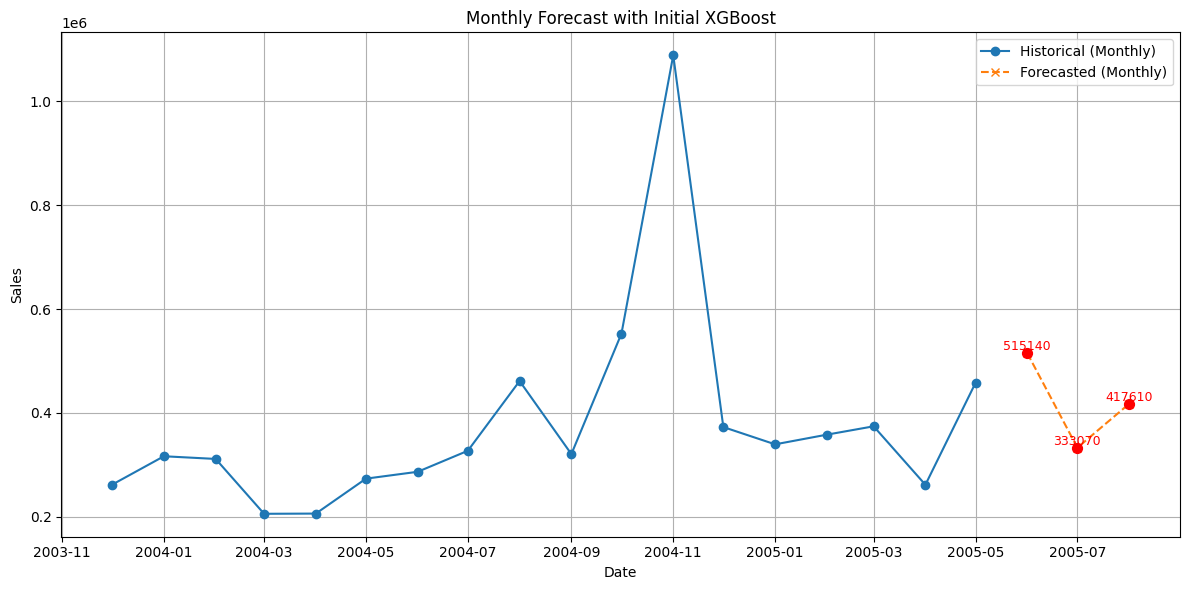

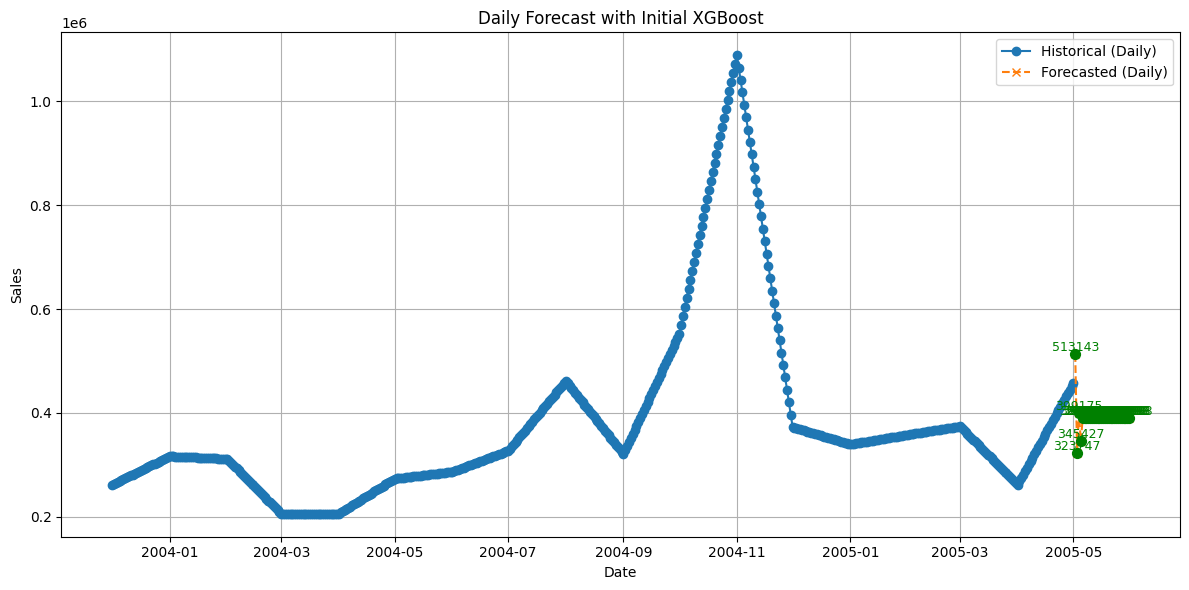

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 13, number of used features: 0
[LightGBM] [Info] Start training from score 383541.463942
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the

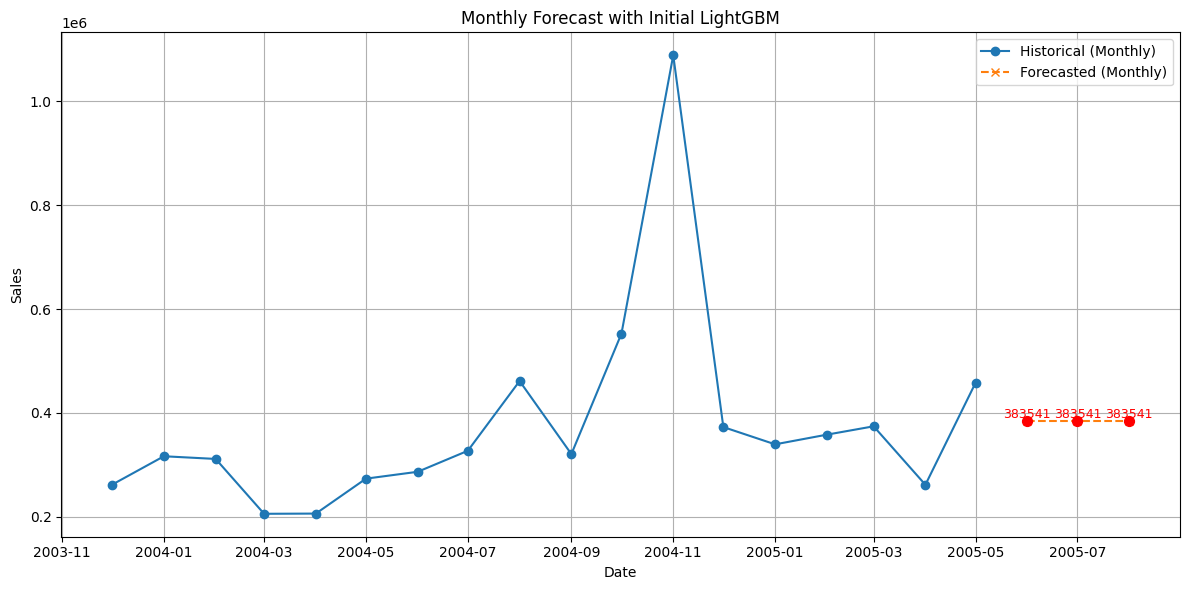

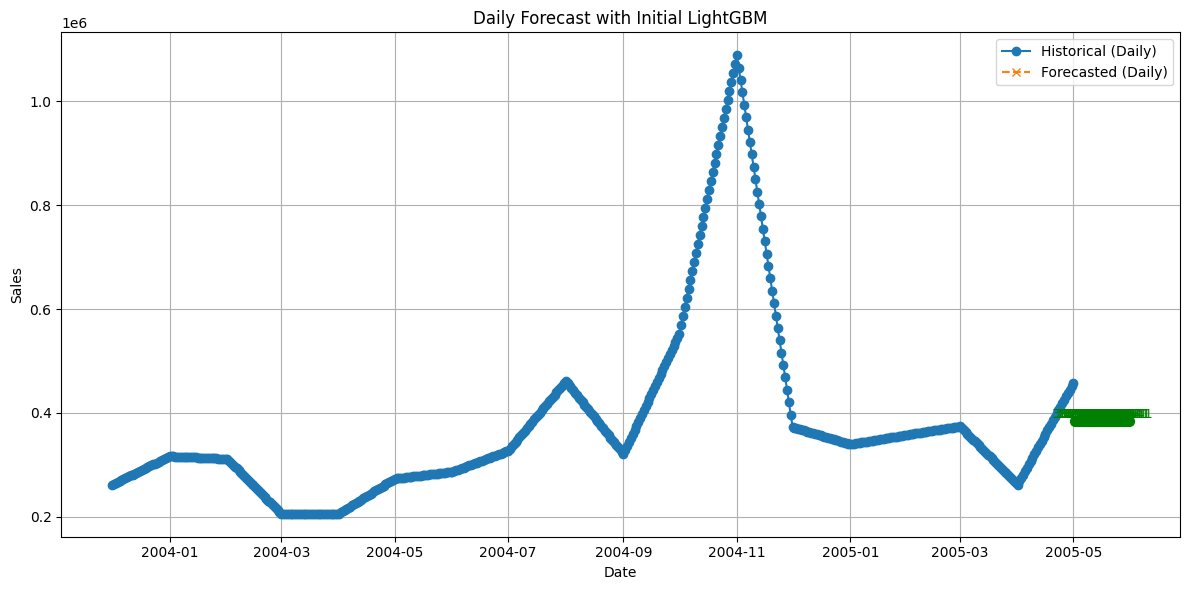

✅ Initial CatBoost - MAE: 26851.83, RMSE: 42722.54


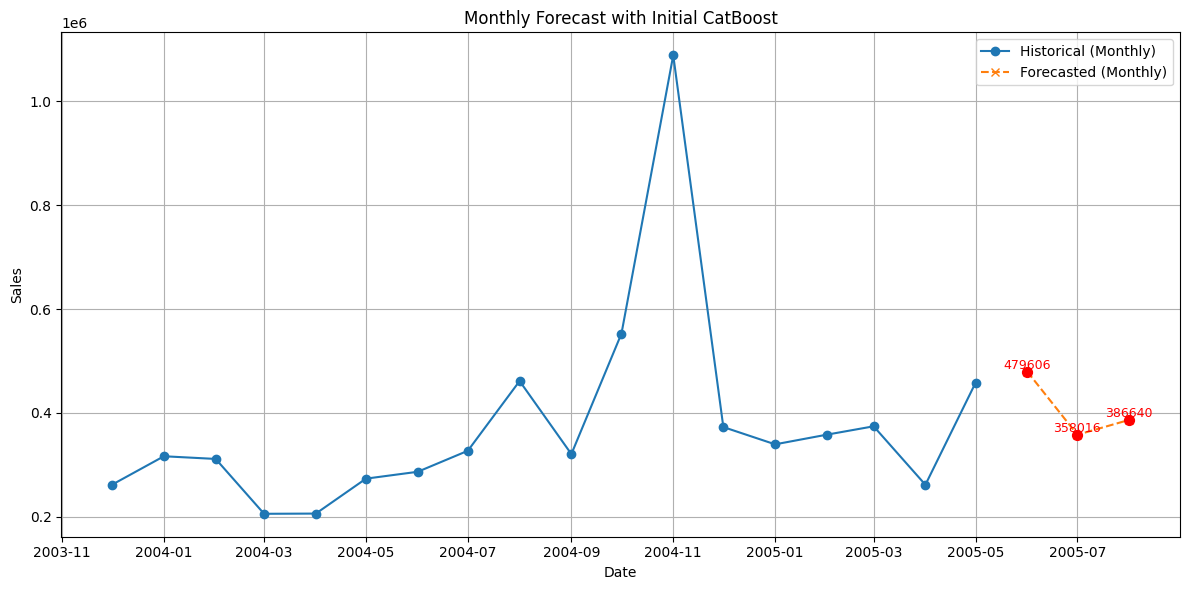

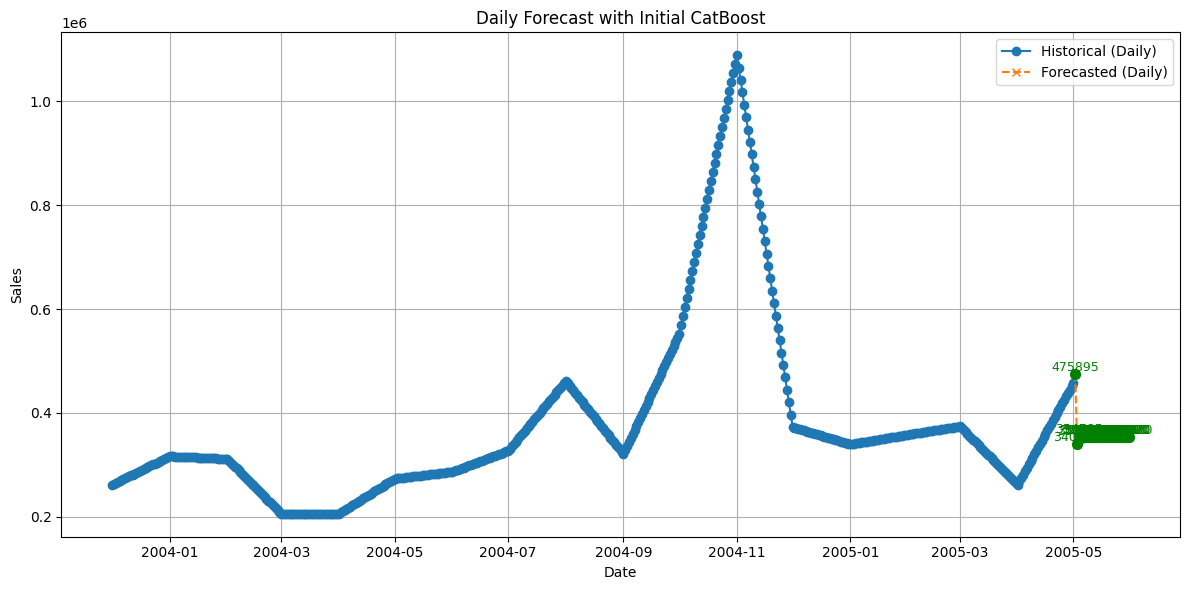

✅ Initial RandomForest - MAE: 59771.37, RMSE: 68606.03


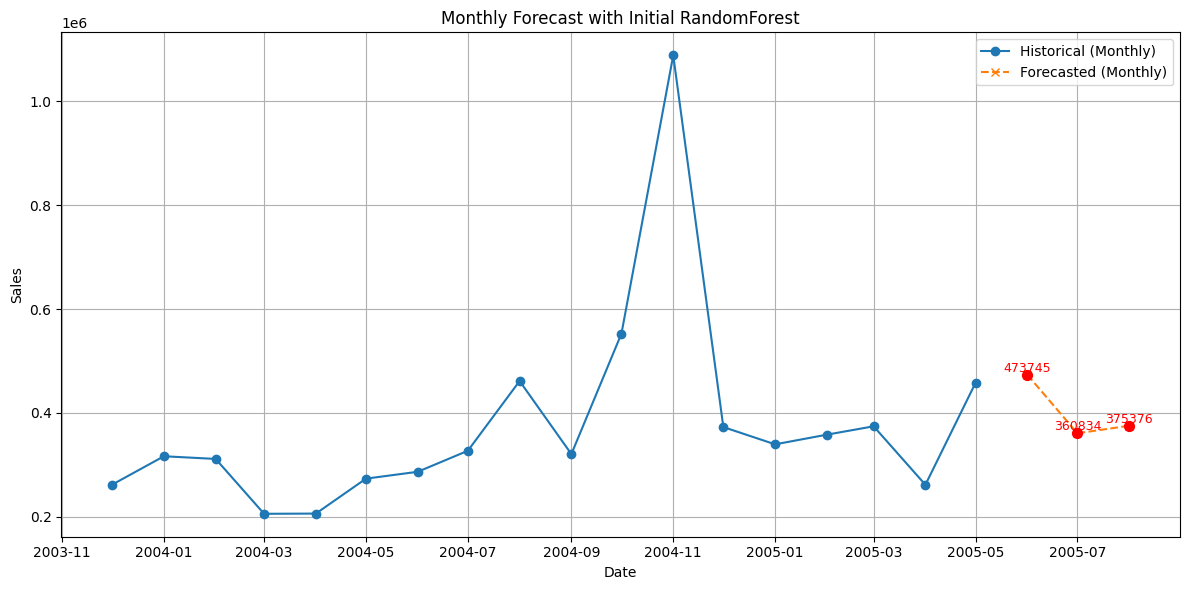

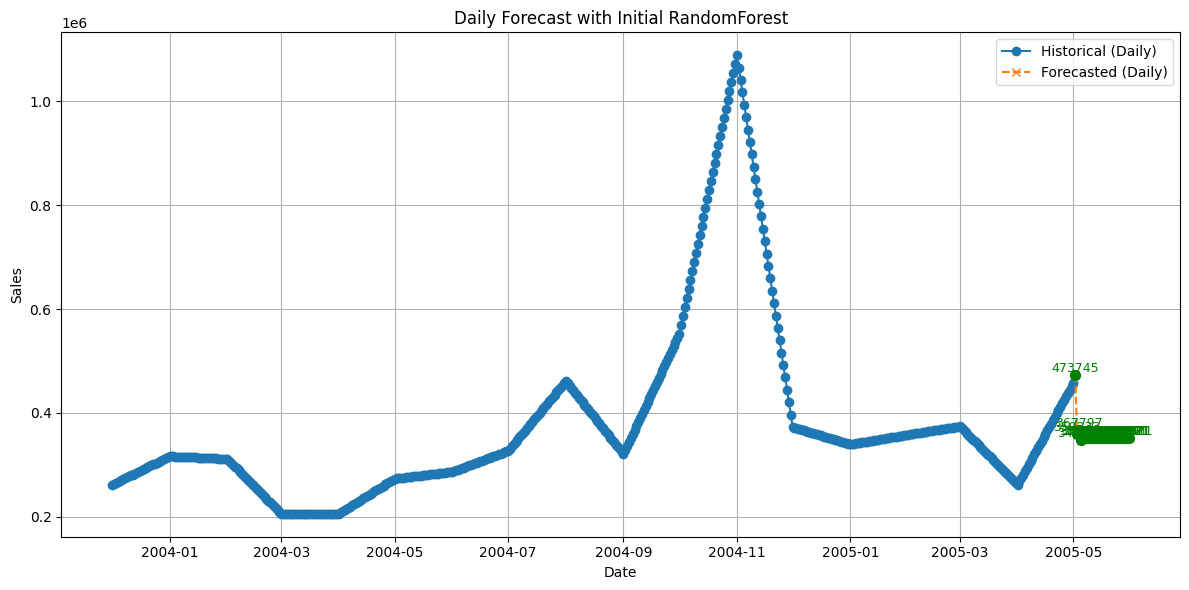

✅ Initial GradientBoosting - MAE: 48039.07, RMSE: 62850.30


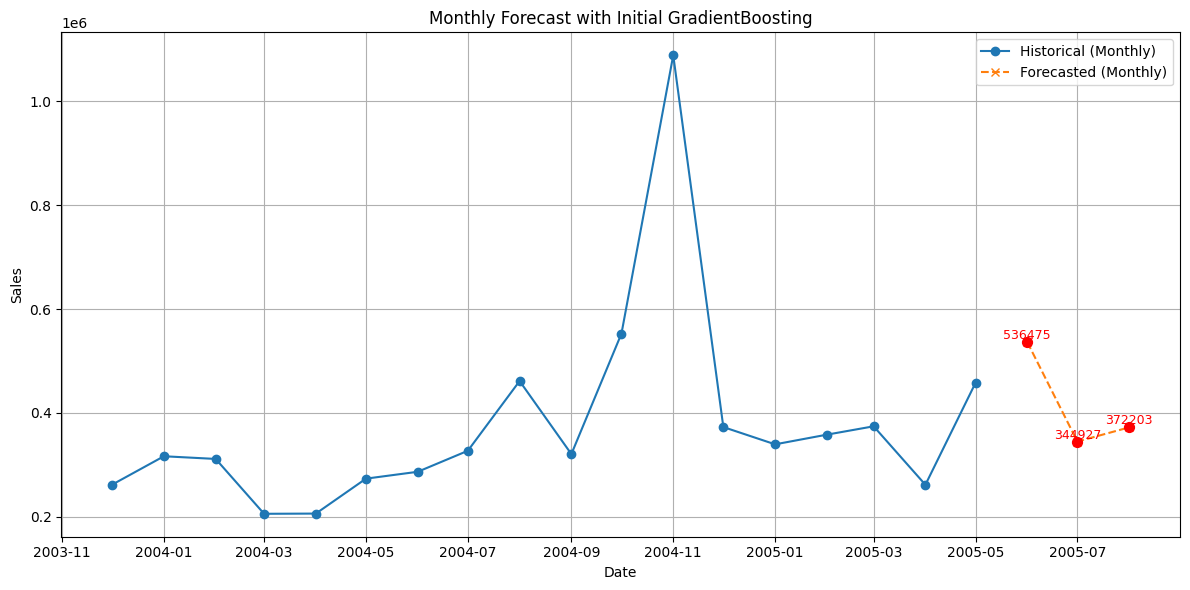

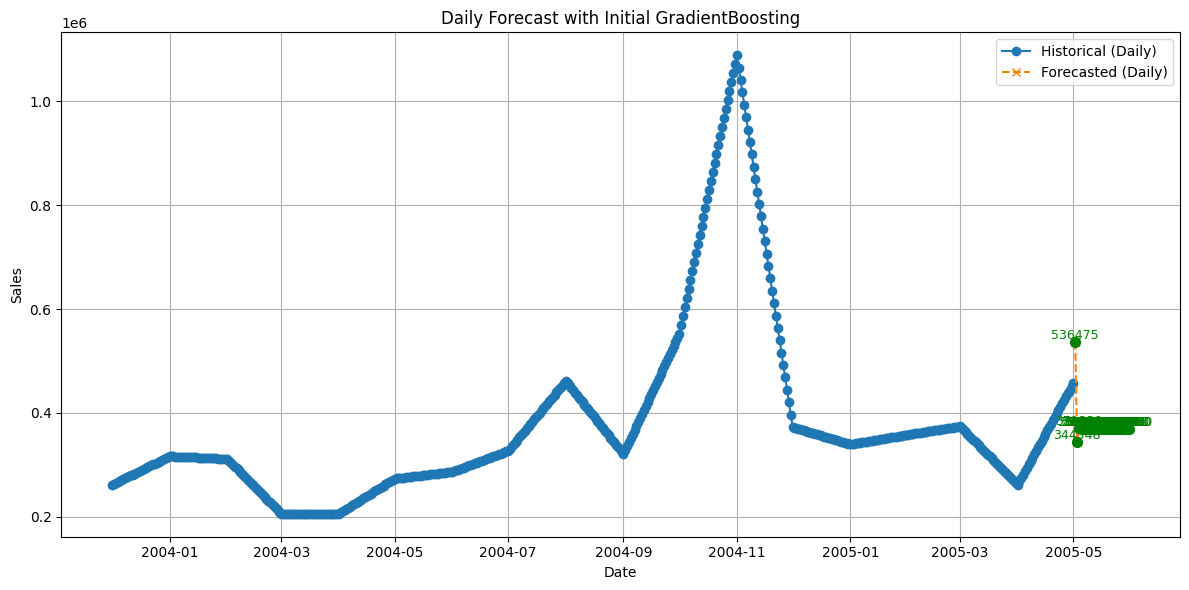

✅ Initial AdaBoost - MAE: 46148.45, RMSE: 55753.80


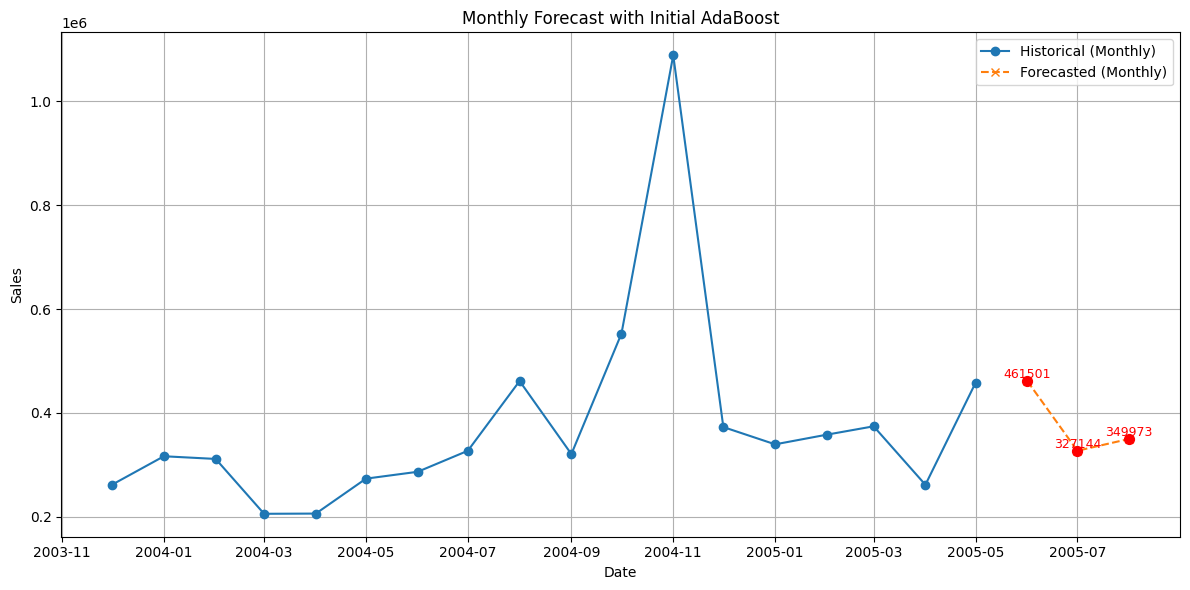

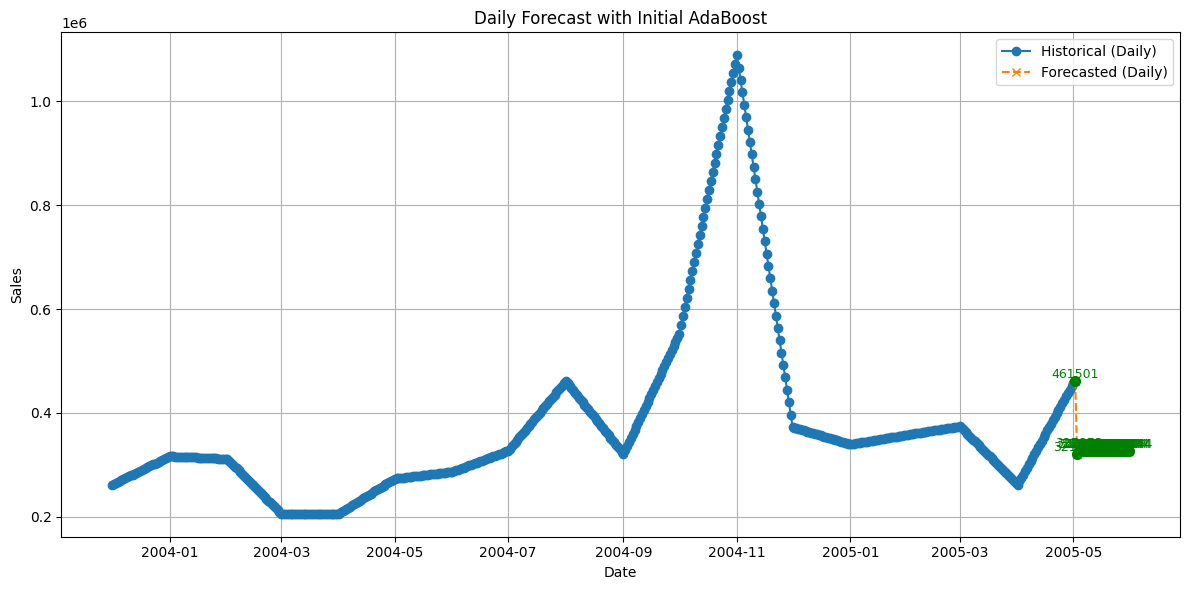

✅ Initial KNeighbors - MAE: 52590.71, RMSE: 72541.04


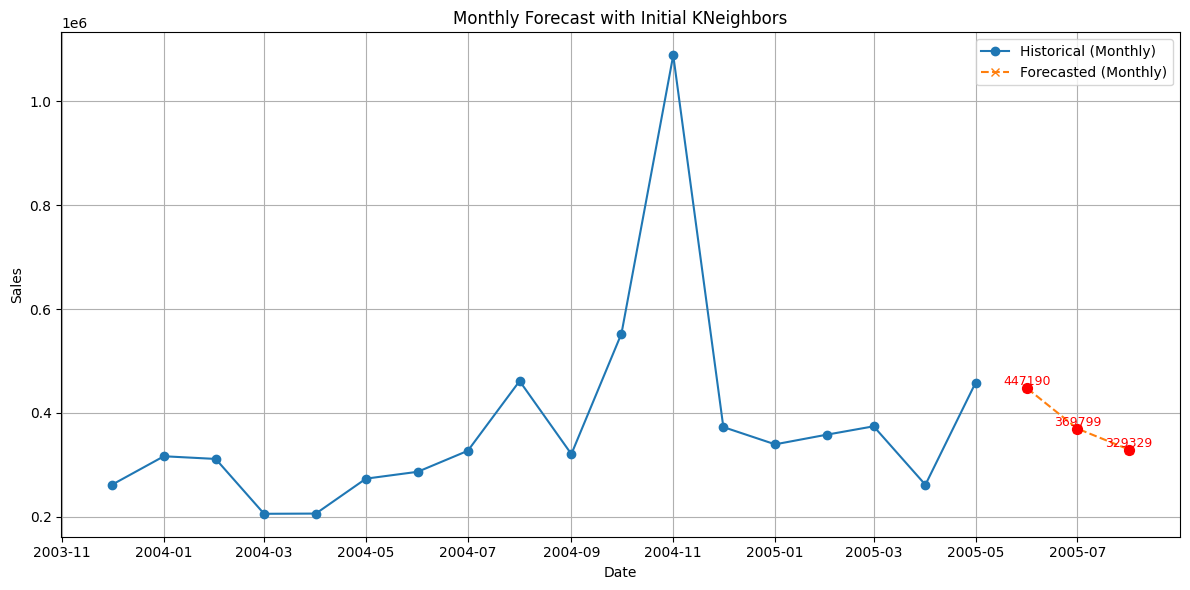

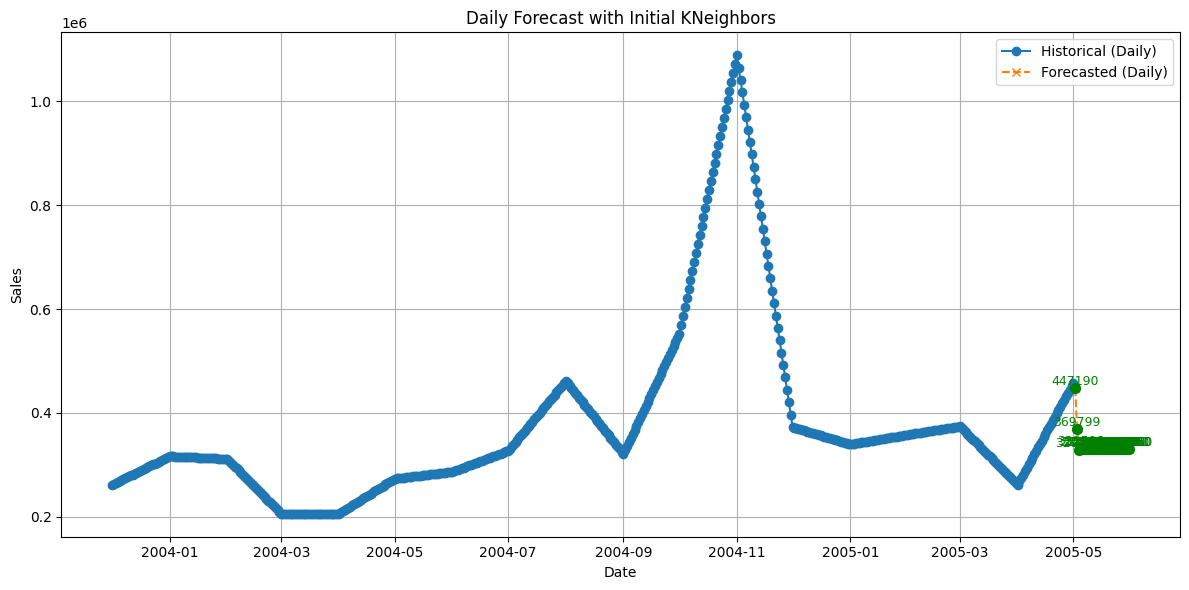

✅ Initial DecisionTree - MAE: 21584.03, RMSE: 29509.52


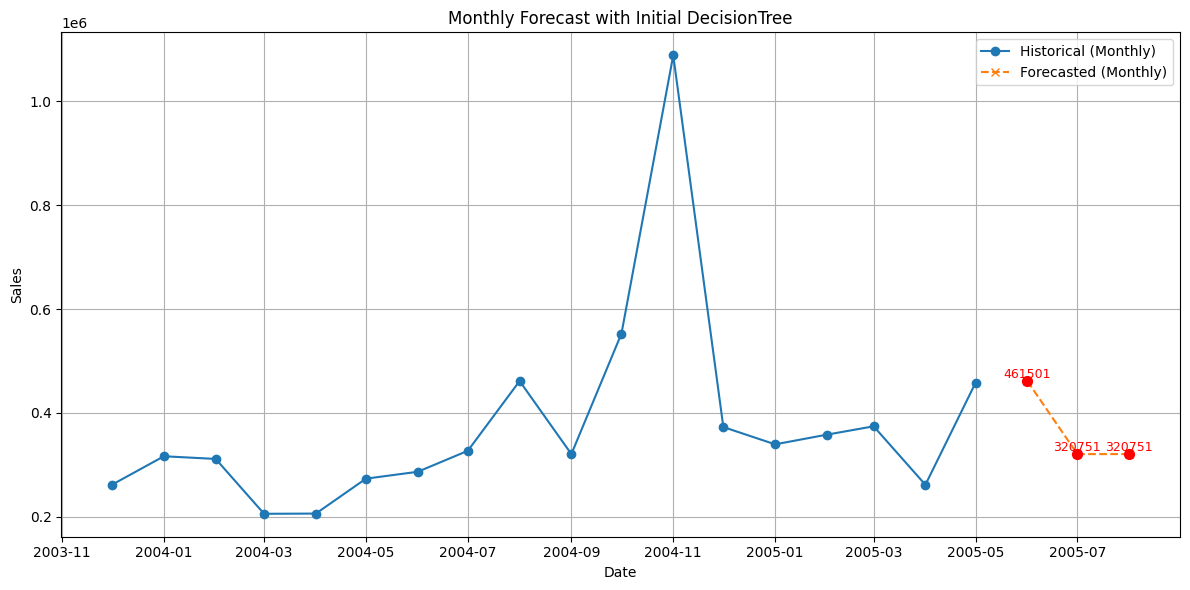

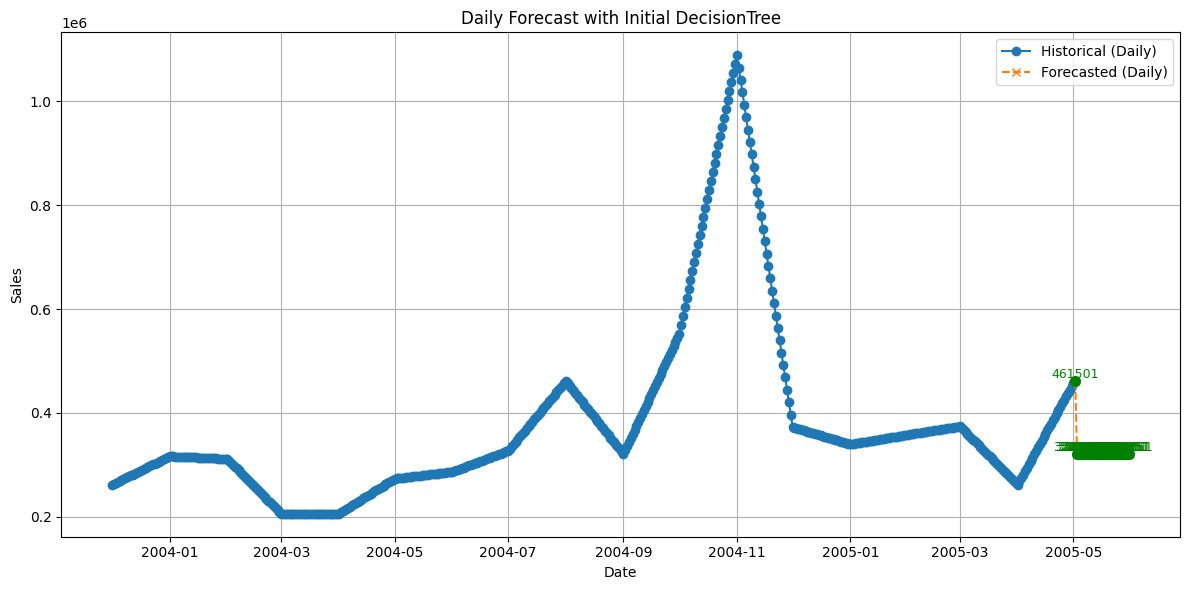

✅ Initial ElasticNet - MAE: 0.01, RMSE: 0.01


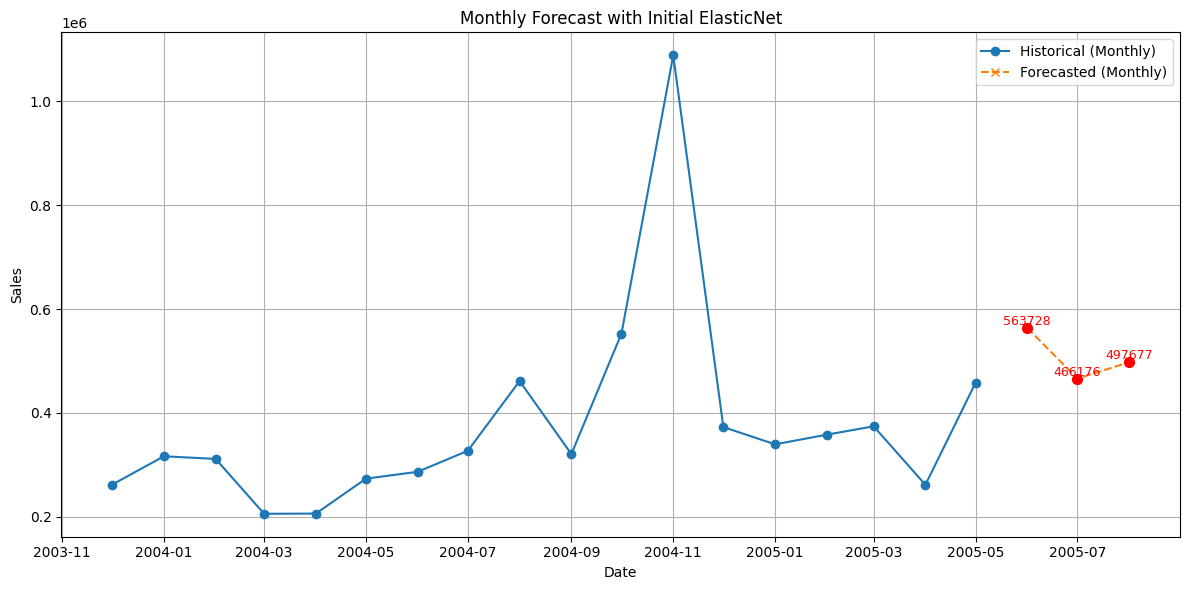

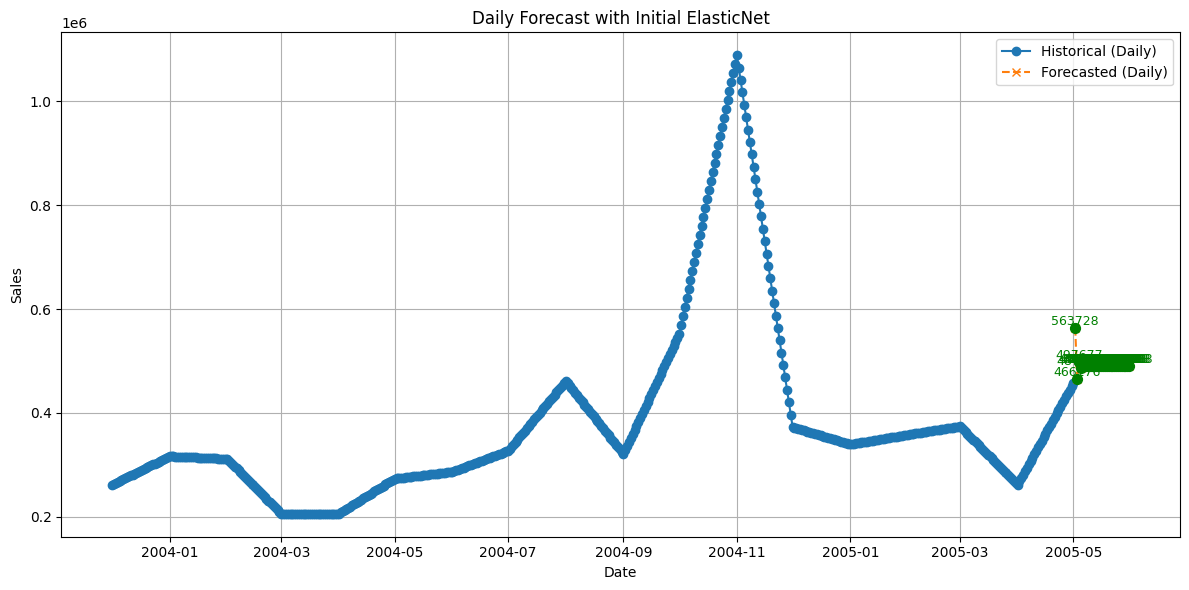

In [74]:
for name, model in models.items():
    predict_and_plot(model, X_train, y_train, X_test, y_test, monthly_sales, feature_cols, f"Initial {name}")

# Run optimized XGBoost

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END 

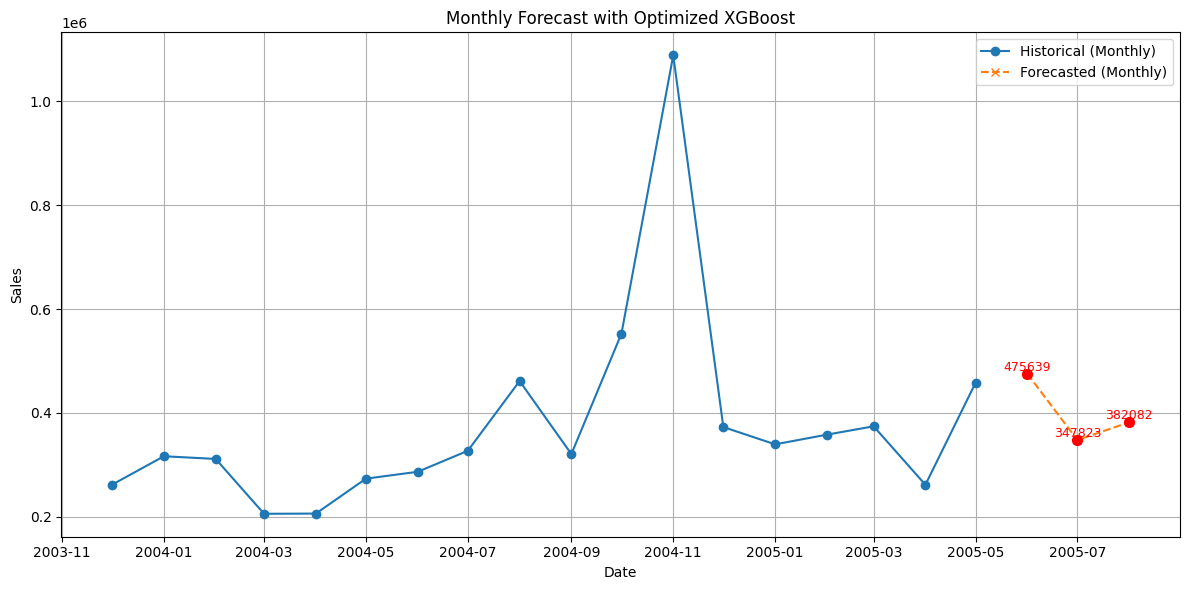

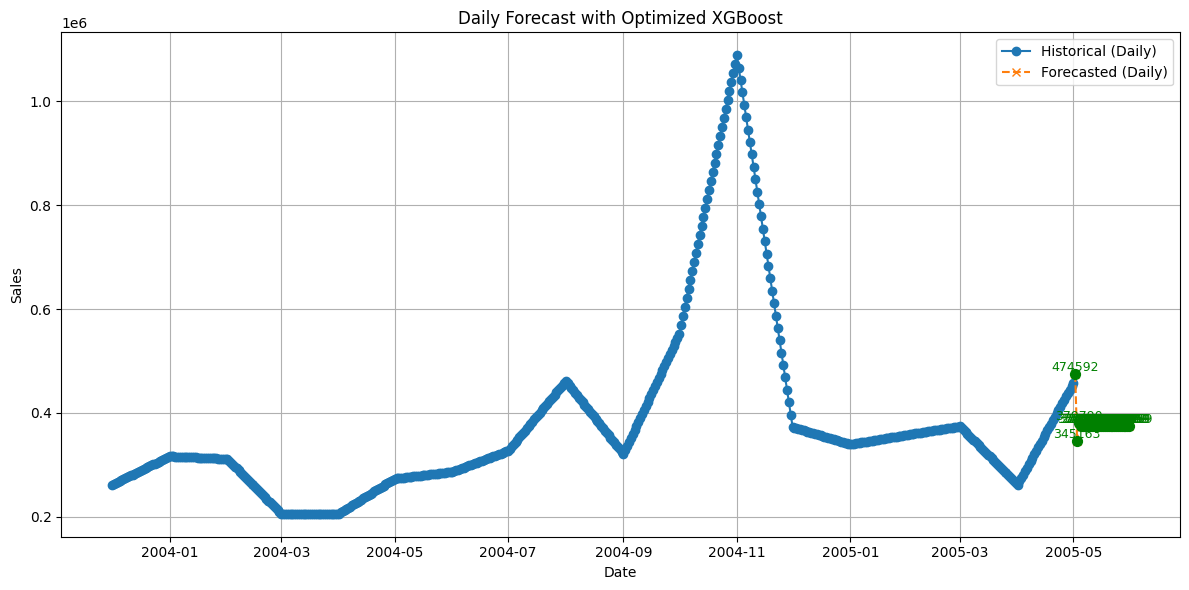

In [75]:
best_xgb = optimize_xgboost(X_train, y_train)
predict_and_plot(best_xgb, X_train, y_train, X_test, y_test, monthly_sales, feature_cols, "Optimized XGBoost")

# Run optimized CatBoost

Fitting 3 folds for each of 20 candidates, totalling 60 fits
✅ Best CatBoost Params: {'learning_rate': 0.1, 'l2_leaf_reg': 3, 'iterations': 700, 'depth': 4, 'border_count': 64}
✅ Optimized CatBoost - MAE: 27408.59, RMSE: 36796.77


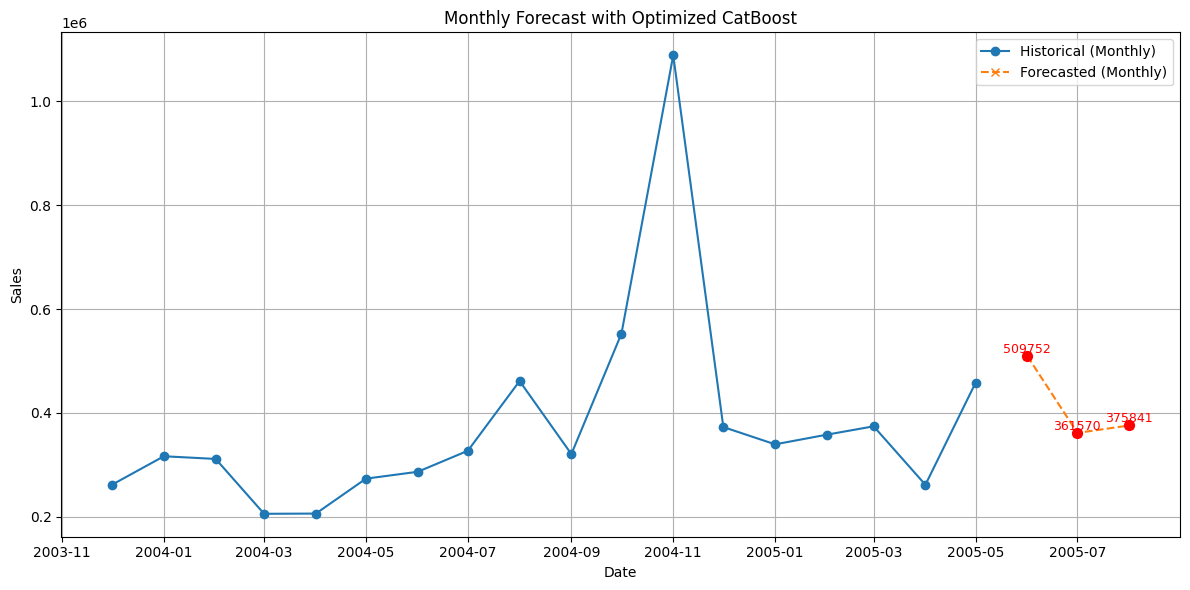

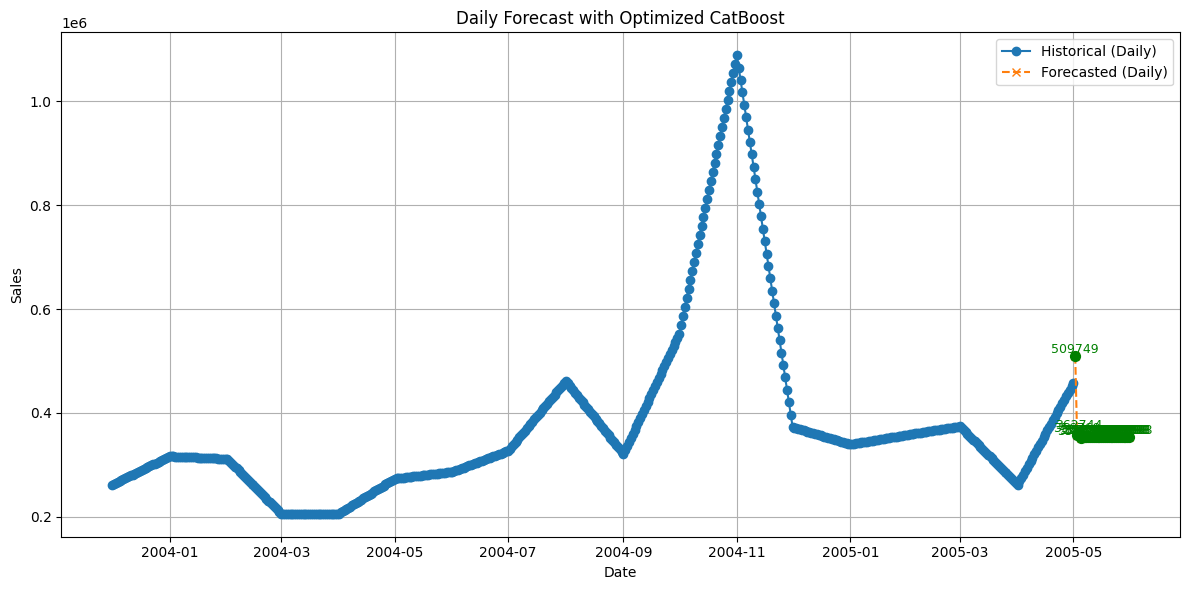

In [76]:
best_catboost = optimize_catboost(X_train, y_train)
predict_and_plot(best_catboost, X_train, y_train, X_test, y_test, monthly_sales, feature_cols, "Optimized CatBoost")


# Run product line forecasts


📈 Forecasting for: Classic Cars
✅ CatBoost (Classic Cars) - MAE: 15769.31, RMSE: 18249.66


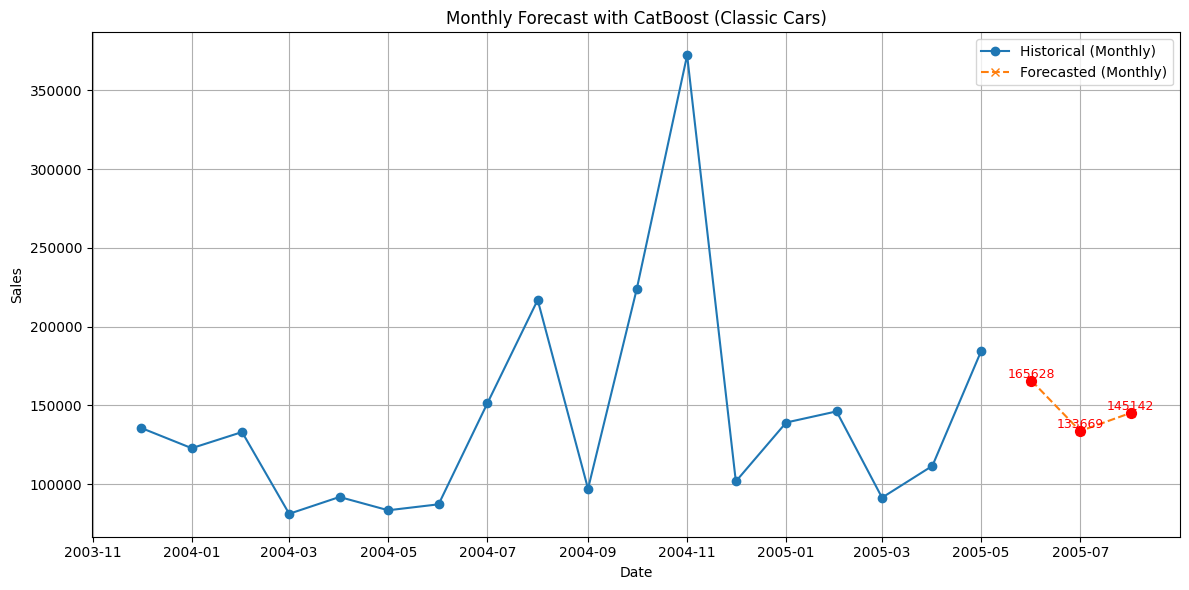

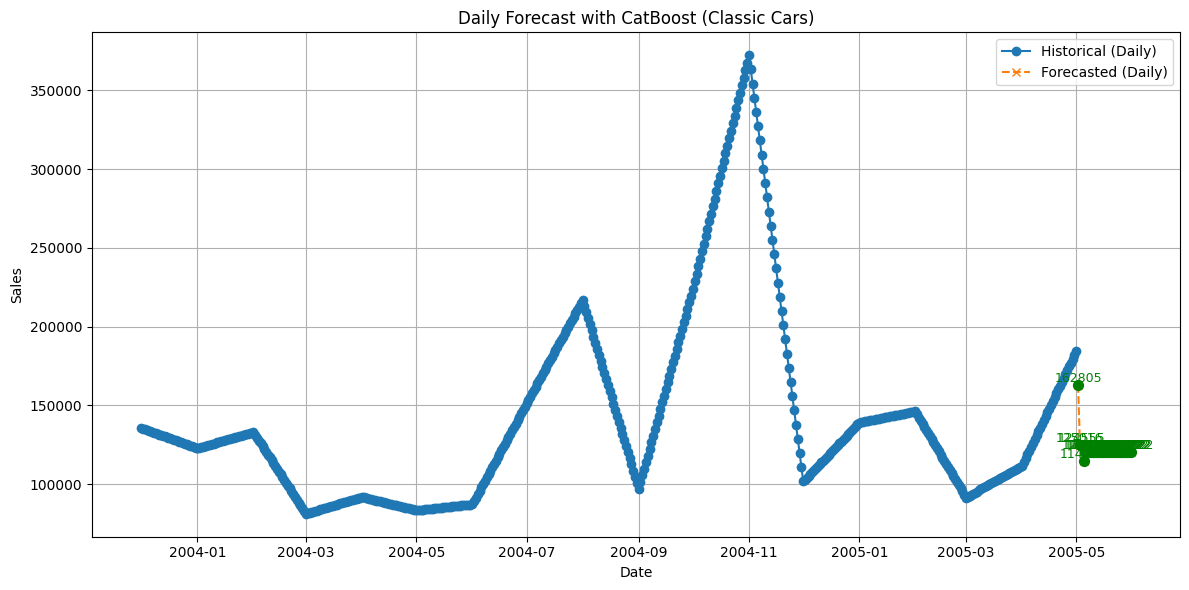


📈 Forecasting for: Motorcycles
✅ CatBoost (Motorcycles) - MAE: 6573.85, RMSE: 9019.35


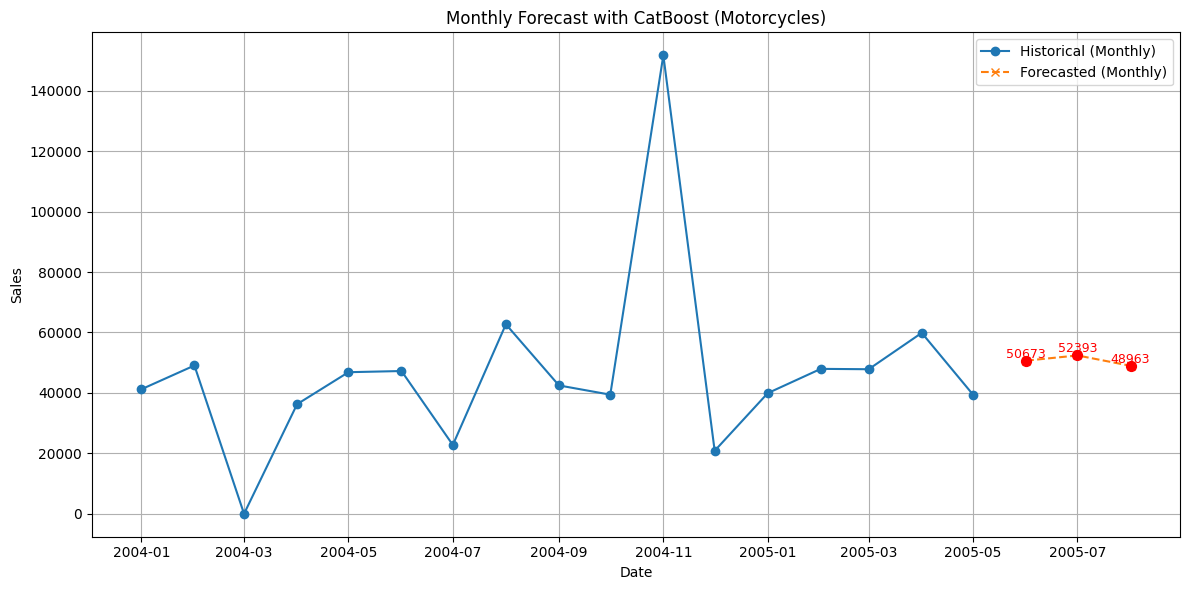

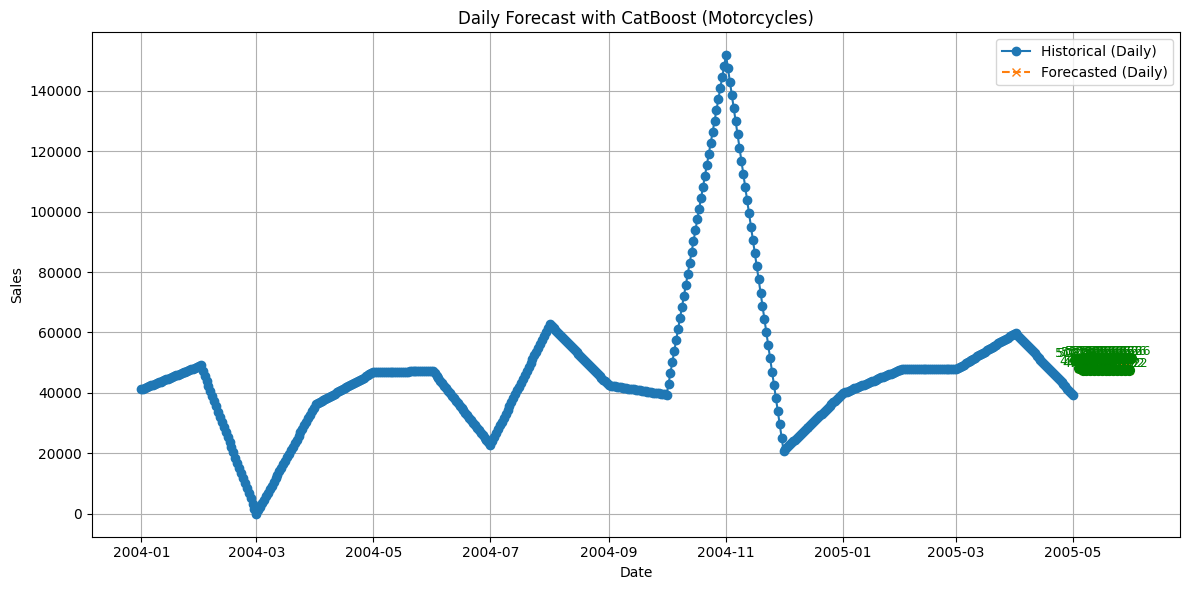


📈 Forecasting for: Planes
✅ CatBoost (Planes) - MAE: 18792.81, RMSE: 22709.80


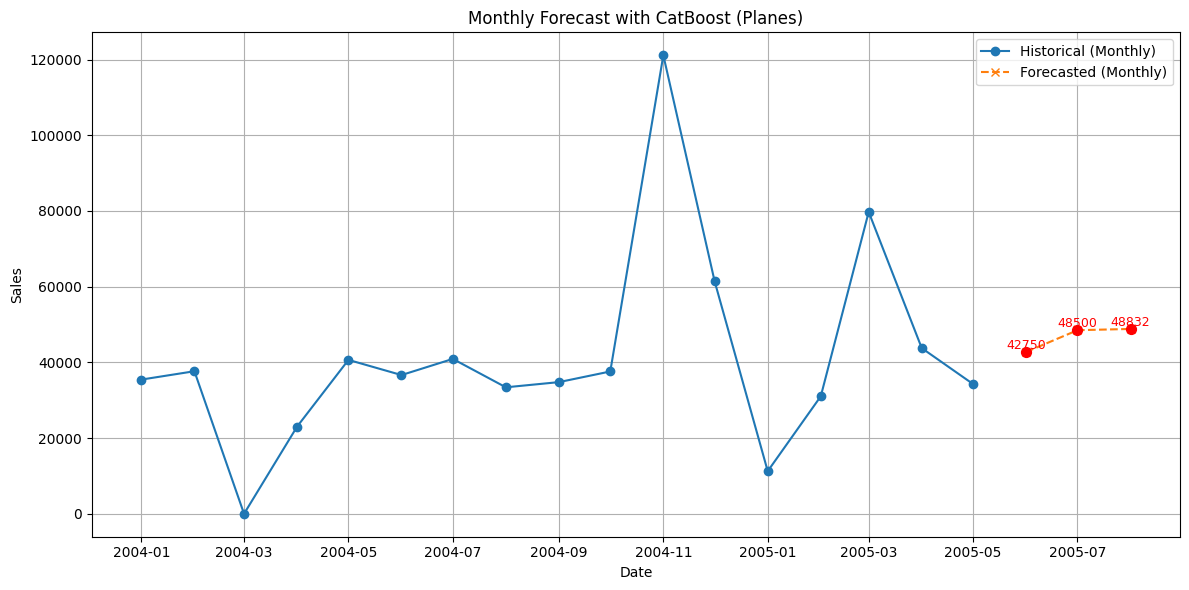

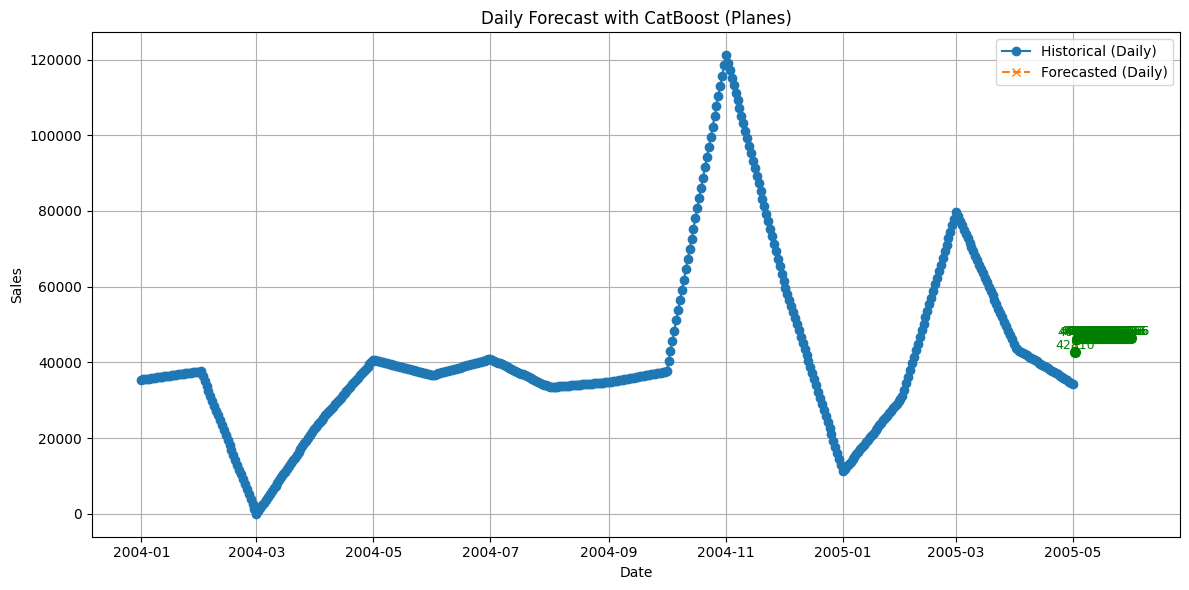


📈 Forecasting for: Ships
✅ CatBoost (Ships) - MAE: 11545.69, RMSE: 14286.20


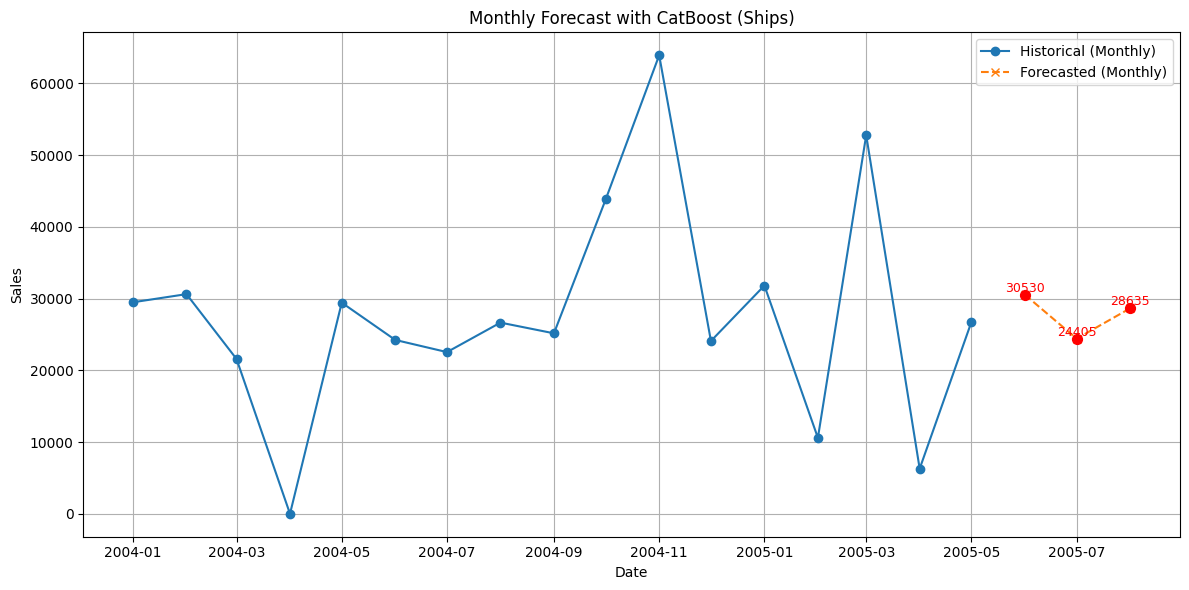

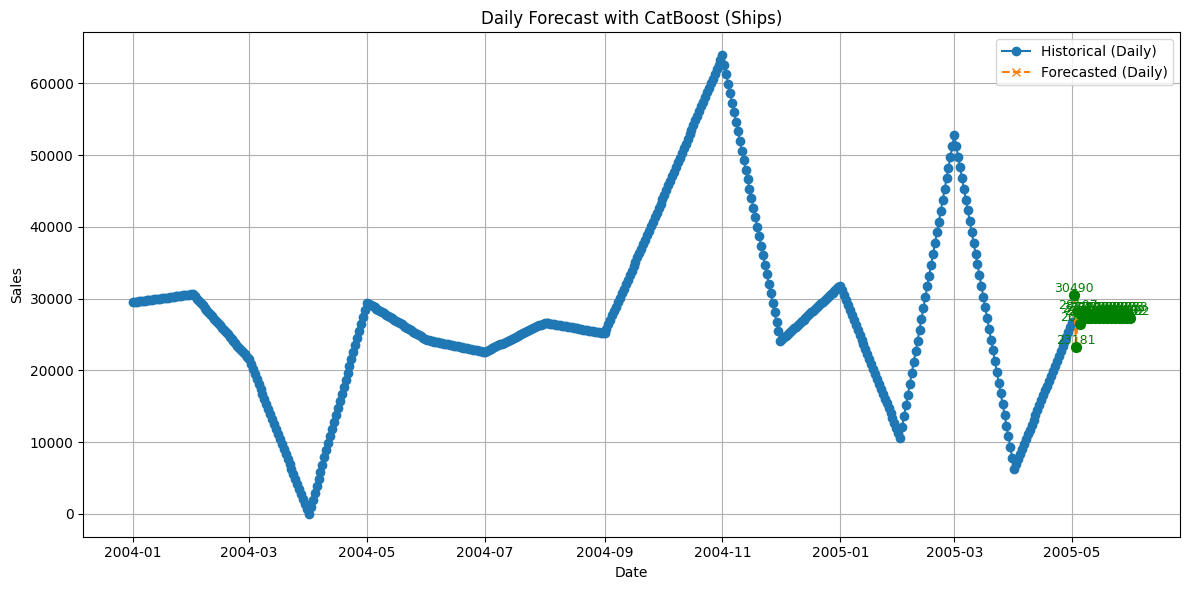


📈 Forecasting for: Trains
✅ CatBoost (Trains) - MAE: 3672.90, RMSE: 4575.95


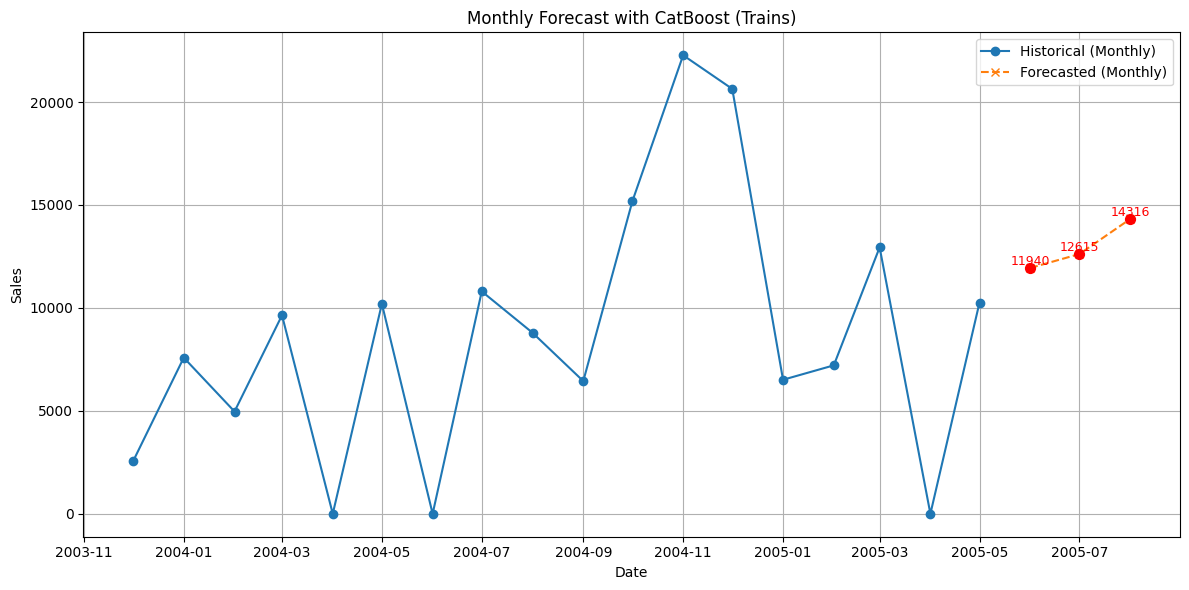

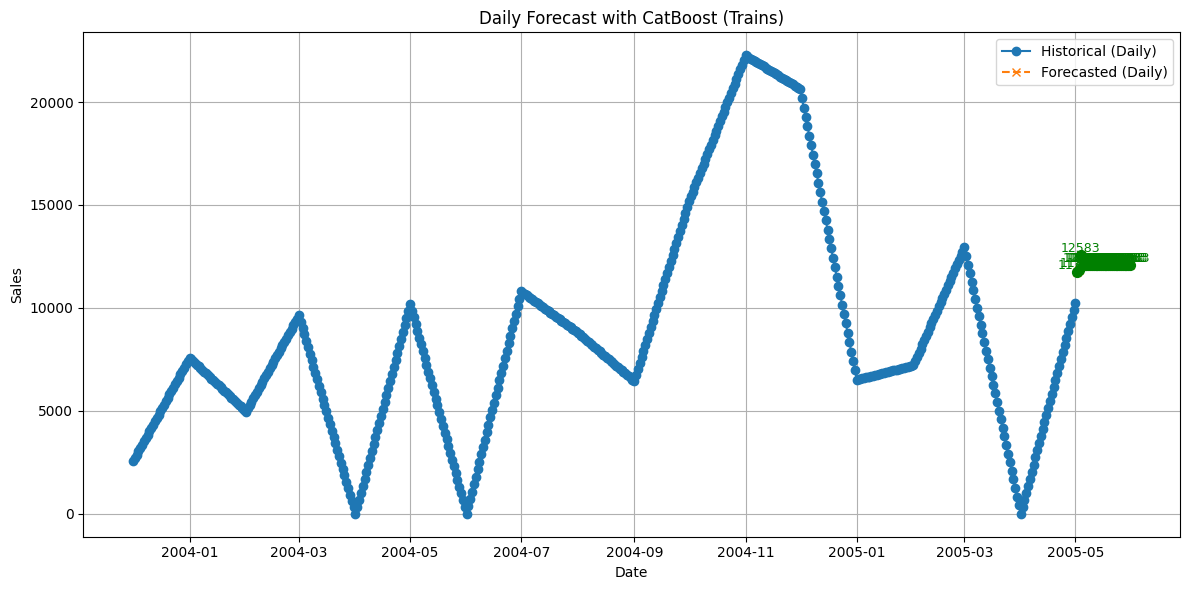


📈 Forecasting for: Trucks and Buses
✅ CatBoost (Trucks and Buses) - MAE: 23552.65, RMSE: 28059.12


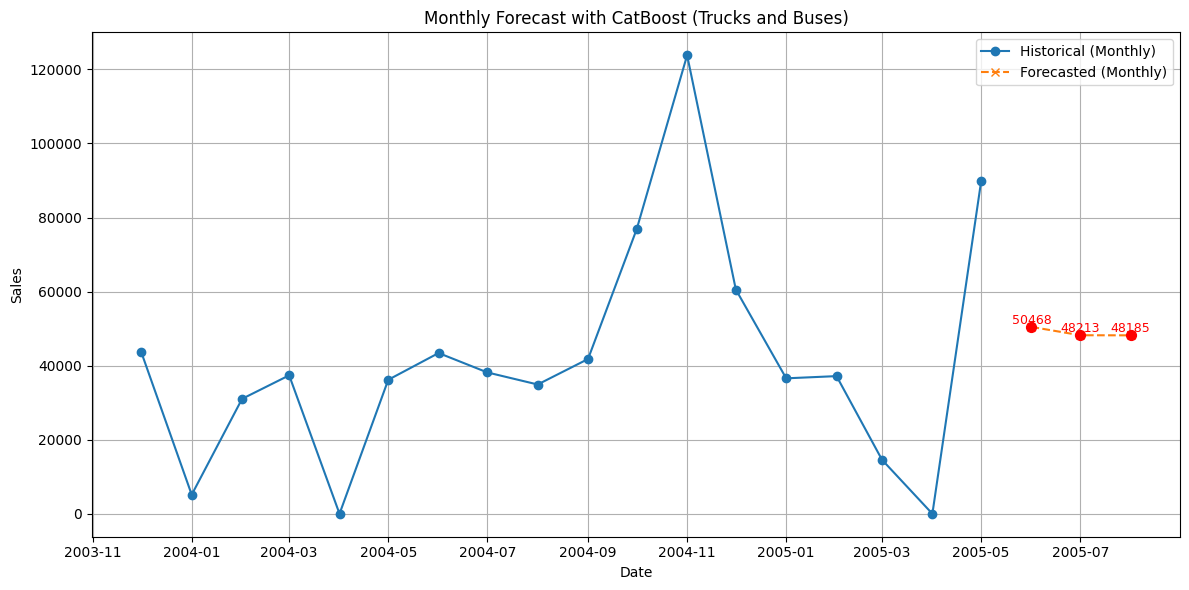

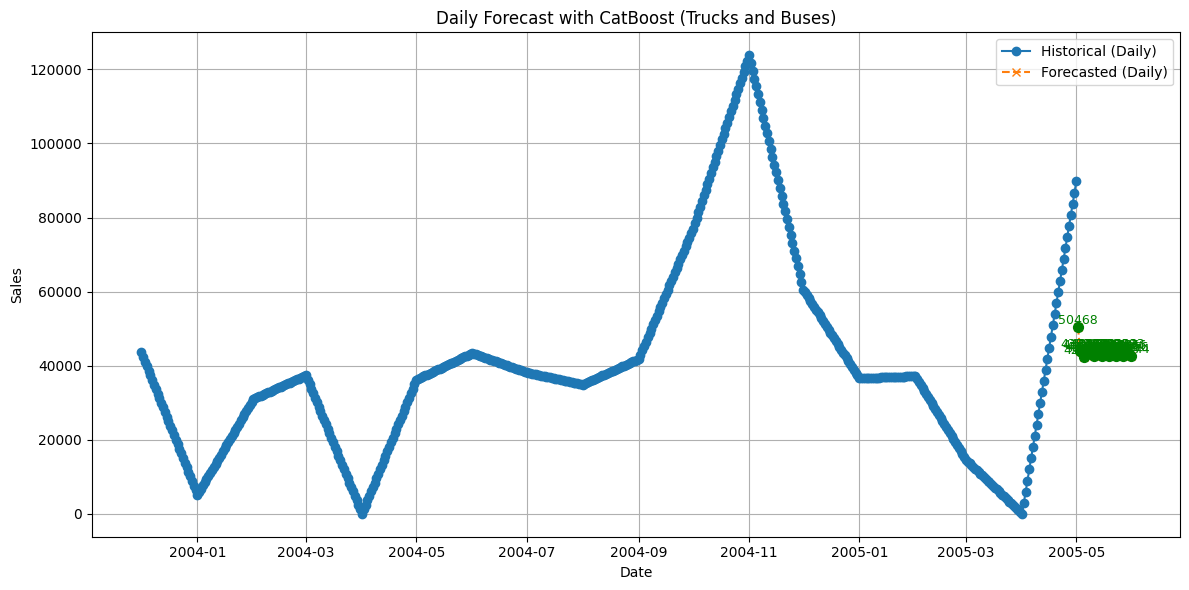


📈 Forecasting for: Vintage Cars
✅ CatBoost (Vintage Cars) - MAE: 8981.35, RMSE: 14899.03


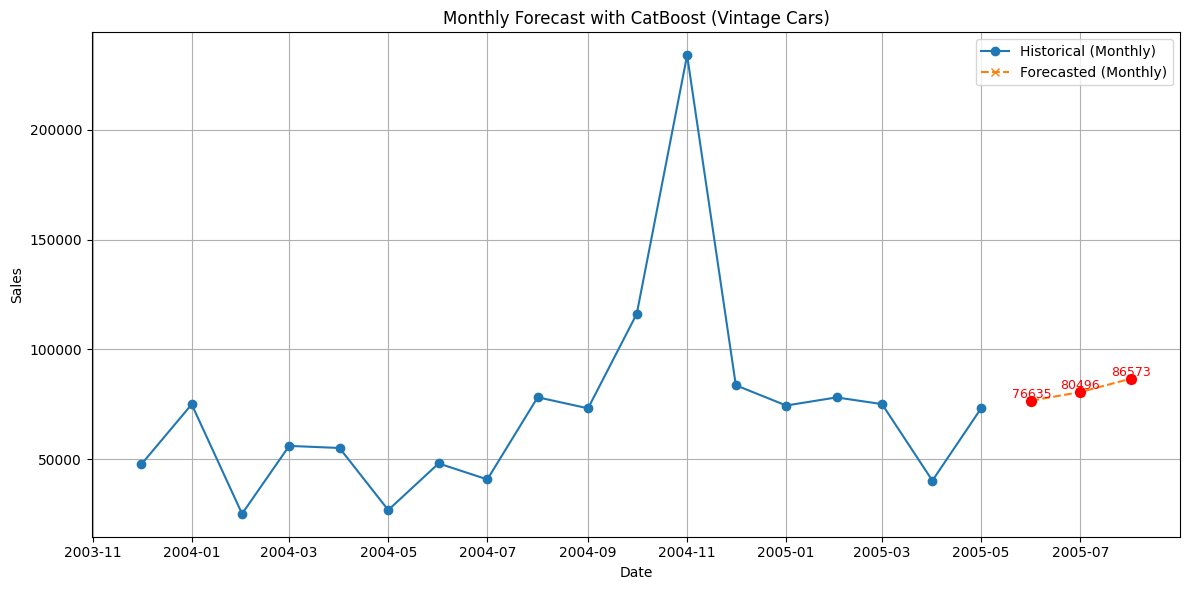

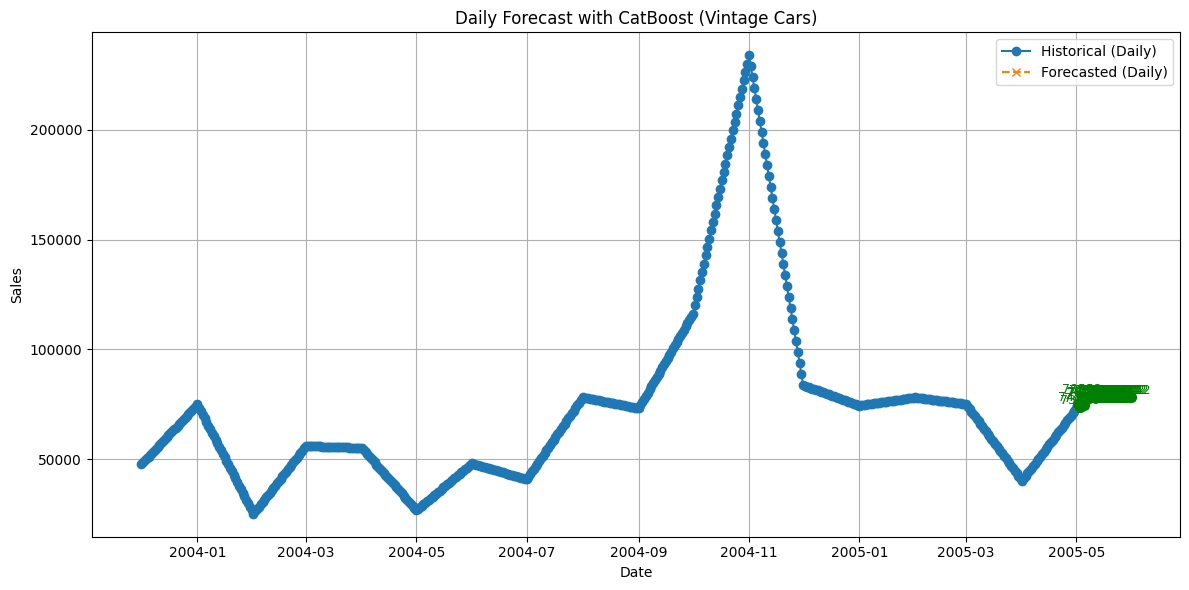


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=300

In [77]:
for col in df.columns:
    if col.startswith('PRODUCTLINE_'):
        product_line_name = col.replace('PRODUCTLINE_', '').replace('_', ' ')
        forecast_productline(df, product_line_name)

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Step 1: Convert ORDERDATE to datetime
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

# Step 2: Group by ORDERDATE and sum SALES
daily_sales = df.groupby('ORDERDATE')['SALES'].sum().reset_index()

# Step 3: Resample to daily and fill missing days
daily_sales = daily_sales.set_index('ORDERDATE').resample('D').sum().fillna(0).reset_index()

# Step 4: Create lag features
daily_sales['Sales_Lag_1'] = daily_sales['SALES'].shift(1)
daily_sales['Sales_Lag_2'] = daily_sales['SALES'].shift(2)
daily_sales['Sales_Lag_3'] = daily_sales['SALES'].shift(3)
daily_sales['Sales_Lag_7'] = daily_sales['SALES'].shift(7)

# Step 5: Create rolling averages
daily_sales['Sales_Rolling3'] = daily_sales['SALES'].rolling(window=3).mean()
daily_sales['Sales_Rolling7'] = daily_sales['SALES'].rolling(window=7).mean()
daily_sales['Sales_Rolling30'] = daily_sales['SALES'].rolling(window=30).mean()

# Step 6: Create date features
daily_sales['Month_Num'] = daily_sales['ORDERDATE'].dt.month
daily_sales['Day_Of_Week'] = daily_sales['ORDERDATE'].dt.dayofweek

# Drop NaNs
daily_sales = daily_sales.dropna().reset_index(drop=True)

In [87]:
# Step 7: Prepare features and target
feature_cols = [
    'Month_Num', 'Day_Of_Week',
    'Sales_Lag_1', 'Sales_Lag_2', 'Sales_Lag_3', 'Sales_Lag_7',
    'Sales_Rolling3', 'Sales_Rolling7', 'Sales_Rolling30'
]

X = daily_sales[feature_cols]
y = daily_sales['SALES']

# Step 8: Train-test split
X_train, X_test = X[:-30], X[-30:]
y_train, y_test = y[:-30], y[-30:]

In [88]:
# Step 9: Train CatBoost
model = CatBoostRegressor(iterations=500, depth=6, learning_rate=0.05, verbose=0, random_state=42)
model.fit(X_train, y_train)

# Step 10: Predict test
y_pred = model.predict(X_test)

In [89]:
# Step 11: Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"✅ CatBoost Daily Forecast → MAE: {mae:.2f}, RMSE: {rmse:.2f}")

✅ CatBoost Daily Forecast → MAE: 1444.23, RMSE: 2035.73


In [91]:
# Step 12: Prepare for next 30 days forecast
future_dates = pd.date_range(start=daily_sales['ORDERDATE'].max() + pd.DateOffset(days=1), periods=30, freq='D')

In [92]:
# Collect recent lags
recent_sales = list(daily_sales['SALES'].tail(7))
recent_sales_lag = recent_sales[::-1]  # reverse for easy indexing

In [93]:
# Rolling means
rolling3 = np.mean(recent_sales[-3:])
rolling7 = np.mean(recent_sales[-7:])
rolling30 = np.mean(daily_sales['SALES'].tail(30))

future_data = []

for date in future_dates:
    next_row = {
        'Month_Num': date.month,
        'Day_Of_Week': date.dayofweek,
        'Sales_Lag_1': recent_sales_lag[0],
        'Sales_Lag_2': recent_sales_lag[1],
        'Sales_Lag_3': recent_sales_lag[2],
        'Sales_Lag_7': recent_sales_lag[6],
        'Sales_Rolling3': rolling3,
        'Sales_Rolling7': rolling7,
        'Sales_Rolling30': rolling30
    }

    pred = model.predict(pd.DataFrame([next_row]))[0]
    future_data.append(pred)

In [94]:
    # Update lags
    recent_sales_lag = [pred] + recent_sales_lag[:-1]

    # Update rolling means
    recent_sales.append(pred)
    if len(recent_sales) > 30:
        recent_sales = recent_sales[1:]
    rolling3 = np.mean(recent_sales[-3:])
    rolling7 = np.mean(recent_sales[-7:])
    rolling30 = np.mean(recent_sales[-30:])

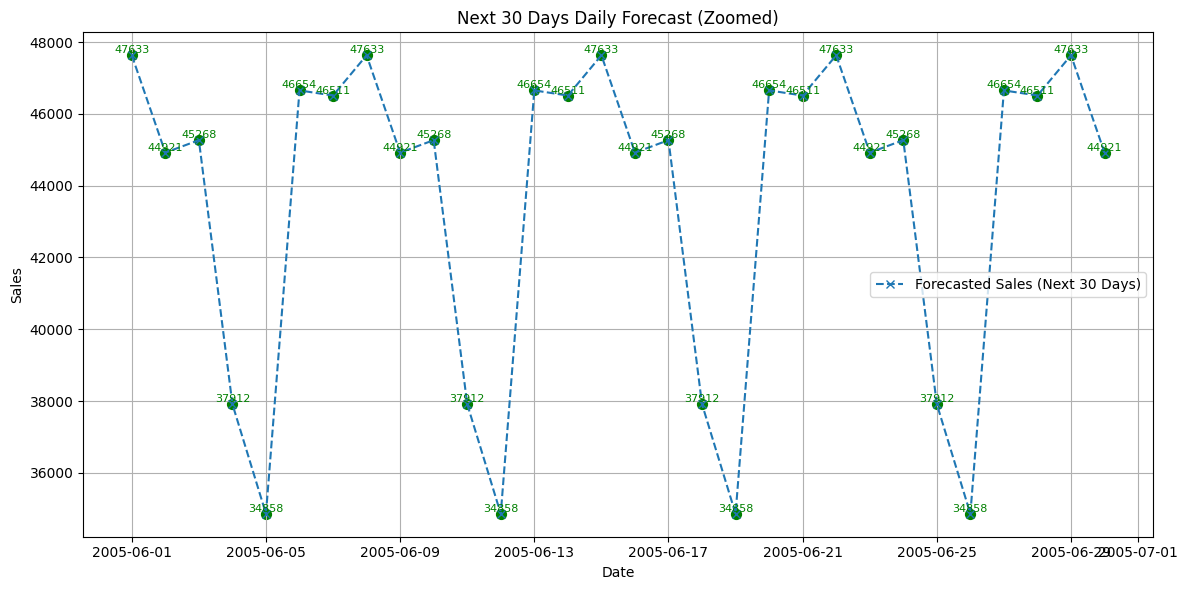

In [95]:
# Step 13: Plot next 30 days only
plt.figure(figsize=(12, 6))
plt.plot(future_dates, future_data, label='Forecasted Sales (Next 30 Days)', marker='x', linestyle='--')

for date, pred in zip(future_dates, future_data):
    plt.scatter(date, pred, color='green', s=50)
    plt.text(date, pred, f'{pred:.0f}', ha='center', va='bottom', fontsize=8, color='green')

plt.title('Next 30 Days Daily Forecast (Zoomed)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [96]:
# Calculate last 30 days average
last_30_avg = daily_sales['SALES'].tail(30).mean()
print(f"Historical last 30 days average: {last_30_avg:.2f}")

# Calculate next 30 days forecast average
forecast_avg = np.mean(future_data)
print(f"Forecasted next 30 days average: {forecast_avg:.2f}")


Historical last 30 days average: 14138.94
Forecasted next 30 days average: 43586.00


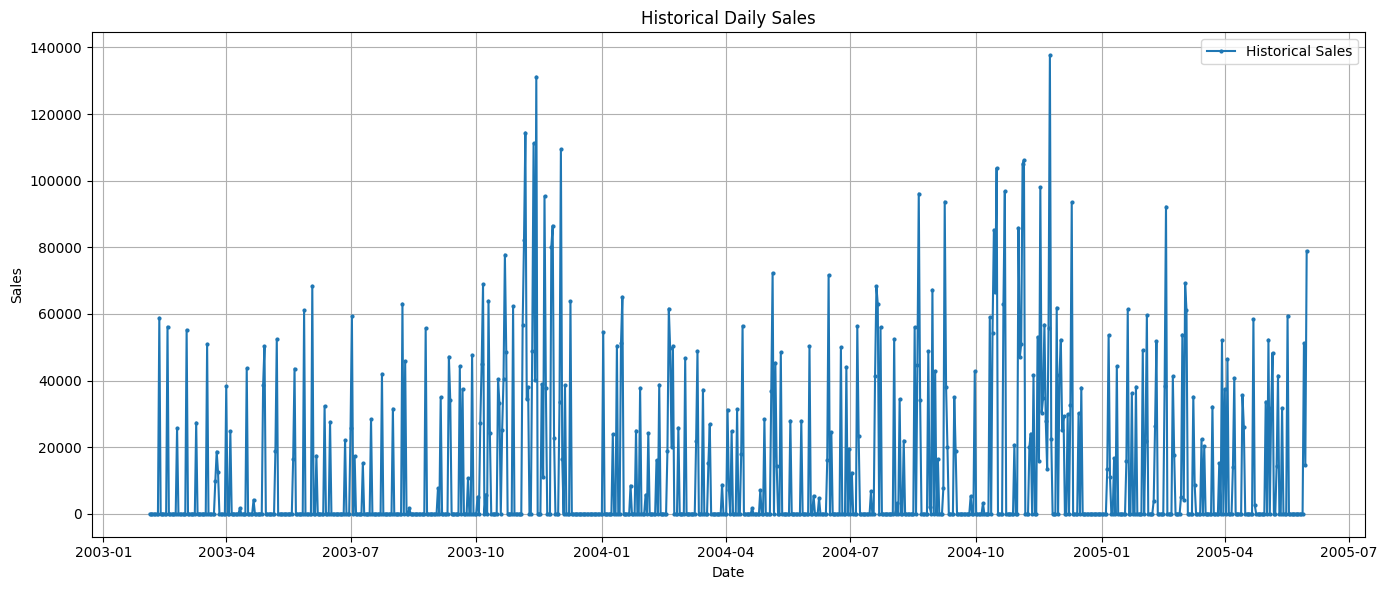

In [97]:
plt.figure(figsize=(14, 6))
plt.plot(daily_sales['ORDERDATE'], daily_sales['SALES'], label='Historical Sales', marker='o', markersize=2)
plt.title('Historical Daily Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


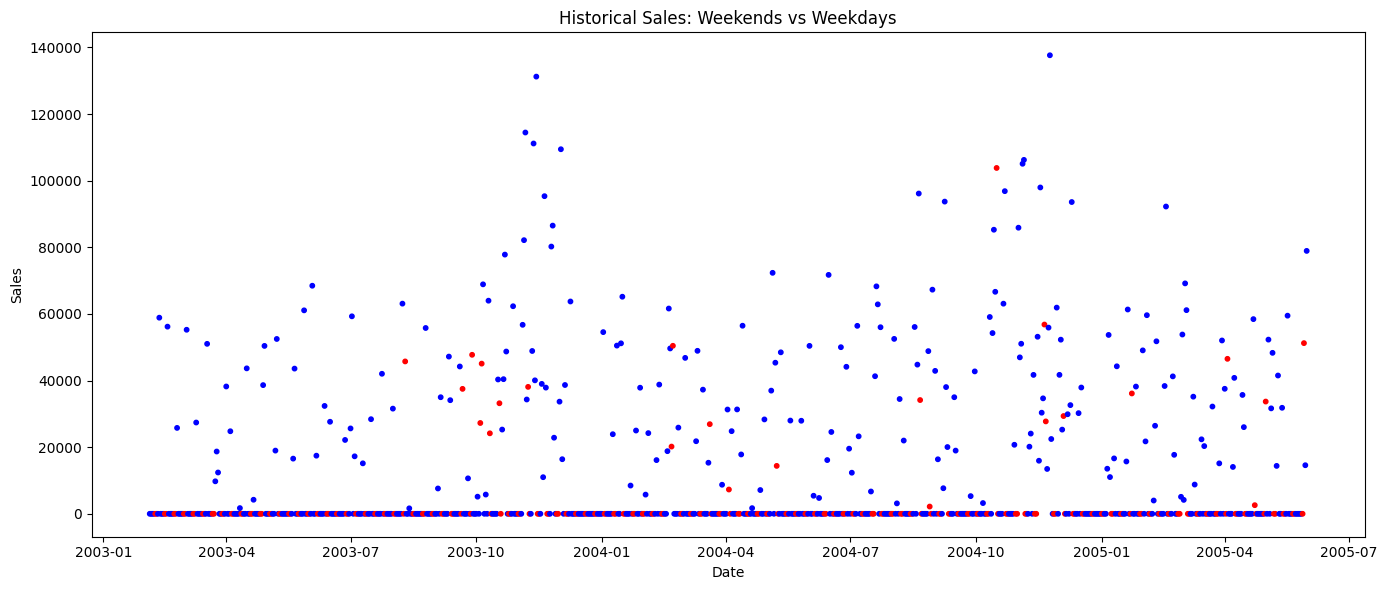

In [98]:
daily_sales['Day_Of_Week'] = daily_sales['ORDERDATE'].dt.dayofweek  # 0=Monday, 6=Sunday
daily_sales['Is_Weekend'] = daily_sales['Day_Of_Week'] >= 5

plt.figure(figsize=(14, 6))
plt.scatter(daily_sales['ORDERDATE'], daily_sales['SALES'], 
            c=daily_sales['Is_Weekend'].map({True: 'red', False: 'blue'}),
            label='Weekend (red) / Weekday (blue)', s=10)
plt.title('Historical Sales: Weekends vs Weekdays')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()


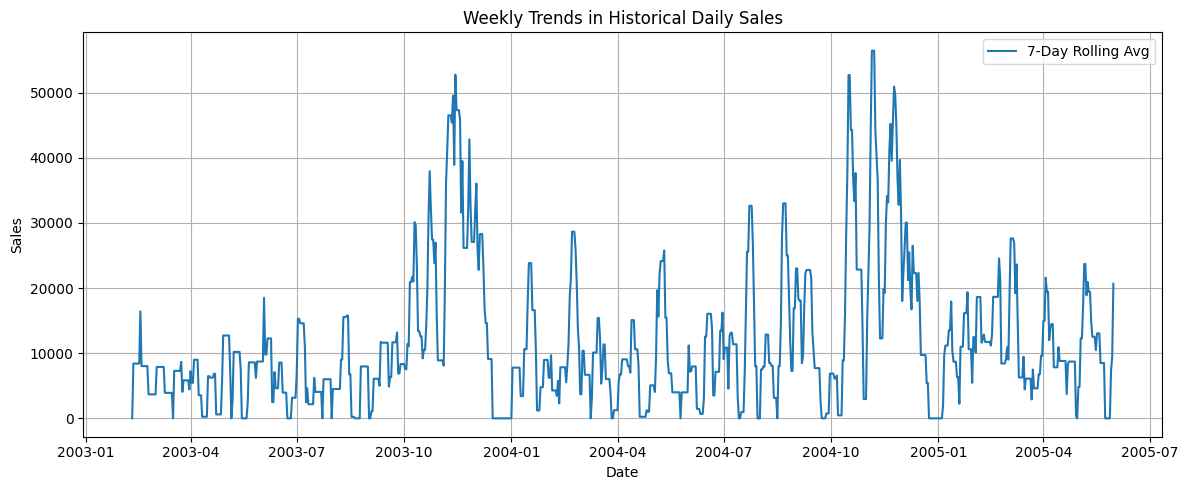

In [99]:
# 7-day rolling average to observe weekly cycles
plt.figure(figsize=(12, 5))
daily_sales['Rolling_7'] = daily_sales['SALES'].rolling(7).mean()
plt.plot(daily_sales['ORDERDATE'], daily_sales['Rolling_7'], label='7-Day Rolling Avg')
plt.title("Weekly Trends in Historical Daily Sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


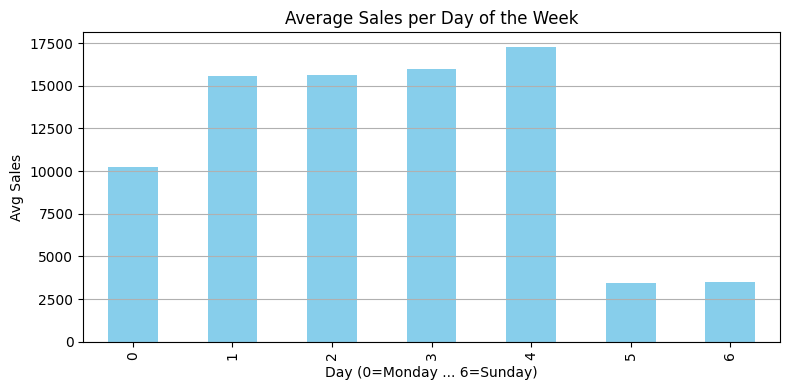

In [100]:
daily_sales['Day_Of_Week'] = daily_sales['ORDERDATE'].dt.dayofweek
dow_avg = daily_sales.groupby('Day_Of_Week')['SALES'].mean()

# Plot
plt.figure(figsize=(8, 4))
dow_avg.plot(kind='bar', color='skyblue')
plt.title("Average Sales per Day of the Week")
plt.xlabel("Day (0=Monday ... 6=Sunday)")
plt.ylabel("Avg Sales")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


✅ Training rows: 694
✅ Testing rows: 174
✅ CatBoost (Improved) → MAE: 3692.80, RMSE: 10121.70


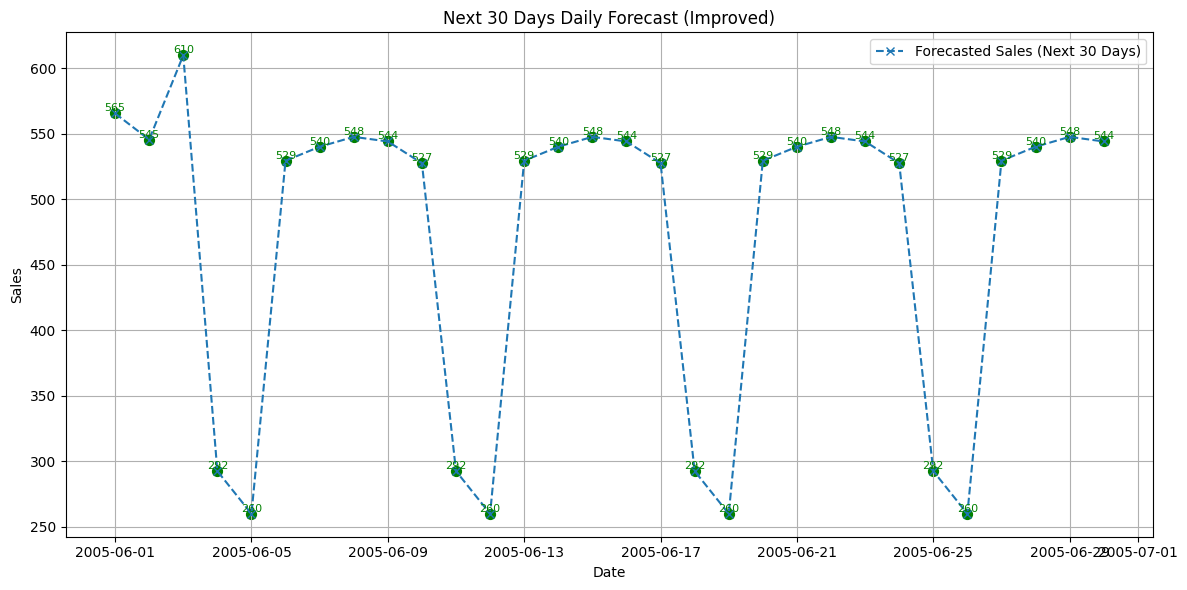

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Step 1: Prepare data
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
daily_sales = df.groupby('ORDERDATE')['SALES'].sum().reset_index()
daily_sales = daily_sales.set_index('ORDERDATE').resample('D').sum().fillna(0).reset_index()

# Step 2: Clip extreme values (99th percentile)
clip_value = daily_sales['SALES'].quantile(0.99)
daily_sales['SALES_CLIPPED'] = np.minimum(daily_sales['SALES'], clip_value)

# Step 3: Log-transform target
daily_sales['SALES_LOG'] = np.log1p(daily_sales['SALES_CLIPPED'])

# Step 4: Create date features
daily_sales['Month_Num'] = daily_sales['ORDERDATE'].dt.month
daily_sales['Day_Of_Week'] = daily_sales['ORDERDATE'].dt.dayofweek
daily_sales['Is_Weekend'] = (daily_sales['Day_Of_Week'] >= 5).astype(int)

# Step 5: Calculate lags and rolling averages with shorter window
daily_sales['Sales_Lag_1'] = daily_sales['SALES_LOG'].shift(1)
daily_sales['Sales_Lag_2'] = daily_sales['SALES_LOG'].shift(2)
daily_sales['Sales_Lag_3'] = daily_sales['SALES_LOG'].shift(3)
daily_sales['Sales_Lag_7'] = daily_sales['SALES_LOG'].shift(7)
daily_sales['Sales_Rolling3'] = daily_sales['SALES_LOG'].rolling(3).mean()
daily_sales['Sales_Rolling7'] = daily_sales['SALES_LOG'].rolling(7).mean()
daily_sales['Sales_Rolling10'] = daily_sales['SALES_LOG'].rolling(10).mean()

daily_sales = daily_sales.dropna().reset_index(drop=True)

# Step 6: Define features and target
feature_cols = [
    'Month_Num', 'Day_Of_Week', 'Is_Weekend',
    'Sales_Lag_1', 'Sales_Lag_2', 'Sales_Lag_3', 'Sales_Lag_7',
    'Sales_Rolling3', 'Sales_Rolling7', 'Sales_Rolling10'
]
X = daily_sales[feature_cols]
y = daily_sales['SALES_LOG']

# Step 7: Train-test split (80/20 split)
split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

print("✅ Training rows:", X_train.shape[0])
print("✅ Testing rows:", X_test.shape[0])

# Step 8: Train CatBoost
model = CatBoostRegressor(iterations=500, depth=6, learning_rate=0.05, verbose=0, random_state=42)
model.fit(X_train, y_train)

# Step 9: Predict and evaluate
y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_test_true = np.expm1(y_test)

mae = mean_absolute_error(y_test_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_true, y_pred))
print(f"✅ CatBoost (Improved) → MAE: {mae:.2f}, RMSE: {rmse:.2f}")

# Step 10: Predict next 30 days
future_dates = pd.date_range(daily_sales['ORDERDATE'].max() + pd.DateOffset(days=1), periods=30, freq='D')

recent_values = list(daily_sales['SALES_LOG'].tail(7))
rolling3 = np.mean(recent_values[-3:])
rolling7 = np.mean(recent_values[-7:])
rolling10 = np.mean(daily_sales['SALES_LOG'].tail(10))

future_data = []

for date in future_dates:
    next_row = {
        'Month_Num': date.month,
        'Day_Of_Week': date.dayofweek,
        'Is_Weekend': int(date.dayofweek >= 5),
        'Sales_Lag_1': recent_values[0],
        'Sales_Lag_2': recent_values[1],
        'Sales_Lag_3': recent_values[2],
        'Sales_Lag_7': recent_values[6],
        'Sales_Rolling3': rolling3,
        'Sales_Rolling7': rolling7,
        'Sales_Rolling10': rolling10
    }

    pred_log = model.predict(pd.DataFrame([next_row]))[0]
    pred = np.expm1(pred_log)
    future_data.append(pred)

    # Update recent values and rolling
    recent_values = [pred_log] + recent_values[:-1]
    recent_for_rolling = [np.expm1(x) for x in recent_values]
    rolling3 = np.mean(recent_for_rolling[:3])
    rolling7 = np.mean(recent_for_rolling[:7])
    rolling10 = np.mean([np.expm1(x) for x in daily_sales['SALES_LOG'].tail(9).tolist() + [pred_log]])

# Step 11: Plot next 30 days only
plt.figure(figsize=(12, 6))
plt.plot(future_dates, future_data, label='Forecasted Sales (Next 30 Days)', marker='x', linestyle='--')

for date, pred in zip(future_dates, future_data):
    plt.scatter(date, pred, color='green', s=50)
    plt.text(date, pred, f'{pred:.0f}', ha='center', va='bottom', fontsize=8, color='green')

plt.title('Next 30 Days Daily Forecast (Improved)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [113]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt

# Example: load your data
df_raw = pd.read_csv('/kaggle/input/sample-sales-data/sales_data_sample.csv', encoding='latin1')

# Prepare data
df = df_raw[['ORDERDATE', 'SALES']].copy()
df.rename(columns={'ORDERDATE': 'ds', 'SALES': 'y'}, inplace=True)
df['ds'] = pd.to_datetime(df['ds'])

# Clip extreme outliers (top 95%)
cap_value = df['y'].quantile(0.95)
df['y'] = np.clip(df['y'], 0, cap_value)

# Apply log transform to stabilize variance
df['y'] = np.log1p(df['y'])

# Optional: add holidays (example dates, adjust to your dataset)
holidays = pd.DataFrame({
    'holiday': 'promotion_day',
    'ds': pd.to_datetime(['2005-06-05', '2005-06-12', '2005-06-19', '2005-06-26']),
    'lower_window': 0,
    'upper_window': 1,
})

# Define Prophet model with improvements
model = Prophet(
    seasonality_mode='multiplicative',
    interval_width=0.8,
    holidays=holidays
)

# Add strong weekly seasonality
model.add_seasonality(name='weekly', period=7, fourier_order=3)

# Fit the model
model.fit(df)

# Make future dataframe for 30 days
future = model.make_future_dataframe(periods=30, freq='D')

# Predict
forecast = model.predict(future)

# Convert predictions back (inverse log)
forecast['yhat_real'] = np.expm1(forecast['yhat'])
forecast['yhat_lower_real'] = np.expm1(forecast['yhat_lower'])
forecast['yhat_upper_real'] = np.expm1(forecast['yhat_upper'])

17:08:34 - cmdstanpy - INFO - Chain [1] start processing
17:08:34 - cmdstanpy - INFO - Chain [1] done processing


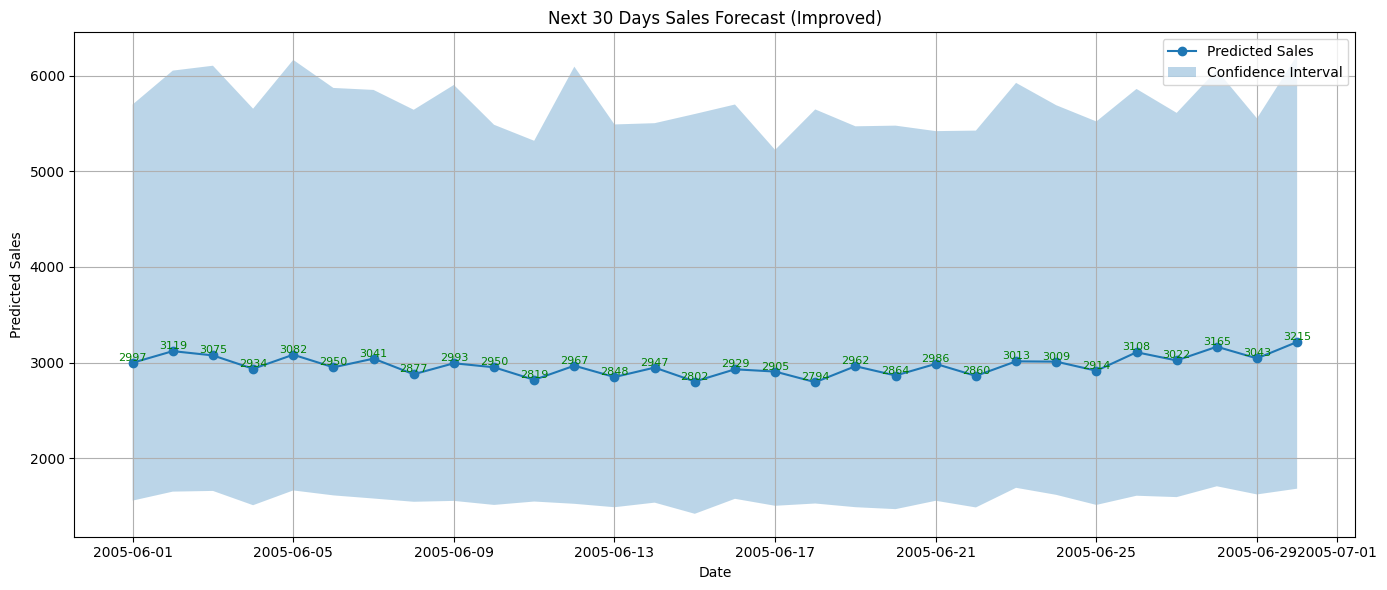

In [114]:
# Plot only next 30 days
forecast_next30 = forecast.tail(30)
plt.figure(figsize=(14, 6))
plt.plot(forecast_next30['ds'], forecast_next30['yhat_real'], label='Predicted Sales', marker='o')
plt.fill_between(forecast_next30['ds'], forecast_next30['yhat_lower_real'], forecast_next30['yhat_upper_real'], alpha=0.3, label='Confidence Interval')

# Annotate points
for i, row in forecast_next30.iterrows():
    plt.text(row['ds'], row['yhat_real'], f"{row['yhat_real']:.0f}", ha='center', va='bottom', fontsize=8, color='green')

plt.title('Next 30 Days Sales Forecast (Improved)')
plt.xlabel('Date')
plt.ylabel('Predicted Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [117]:
# Calculate historical average daily sales
avg_historical = df['y'].mean()
print(f"Historical average daily sales: {avg_historical:.2f}")

# Calculate average of next 30 days predictions
avg_forecast = forecast['yhat'].mean()
print(f"Forecasted average daily sales (next 30 days): {avg_forecast:.2f}")


Historical average daily sales: 8.04
Forecasted average daily sales (next 30 days): 8.03


weekday
0    8.018152
1    8.061016
2    8.016356
3    8.053902
4    8.039478
5    8.009607
6    8.040147
Name: y, dtype: float64


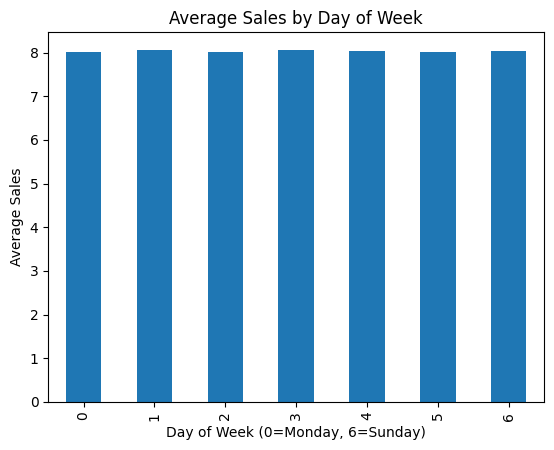

In [110]:
# Add day of week
df['weekday'] = df['ds'].dt.dayofweek  # 0 = Monday, 6 = Sunday

# Calculate average sales by weekday
avg_by_weekday = df.groupby('weekday')['y'].mean()
print(avg_by_weekday)

# Plot
import matplotlib.pyplot as plt
avg_by_weekday.plot(kind='bar')
plt.title('Average Sales by Day of Week')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Average Sales')
plt.show()


In [111]:
# Calculate average width of the confidence interval
forecast['interval_width'] = forecast['yhat_upper'] - forecast['yhat_lower']
avg_interval_width = forecast['interval_width'].mean()
print(f"Average confidence interval width: {avg_interval_width:.2f}")


Average confidence interval width: 1.29


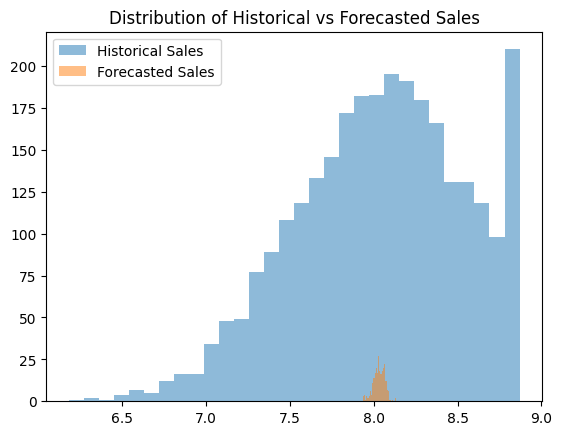

In [112]:
plt.hist(df['y'], bins=30, alpha=0.5, label='Historical Sales')
plt.hist(forecast['yhat'], bins=30, alpha=0.5, label='Forecasted Sales')
plt.legend()
plt.title('Distribution of Historical vs Forecasted Sales')
plt.show()


17:16:38 - cmdstanpy - INFO - Chain [1] start processing
17:16:38 - cmdstanpy - INFO - Chain [1] done processing



Model Evaluation:
CatBoost → MAE: 1604.24, RMSE: 2126.74
XGBoost → MAE: 1616.71, RMSE: 2146.93
Prophet → MAE: 1551.76, RMSE: 2142.64


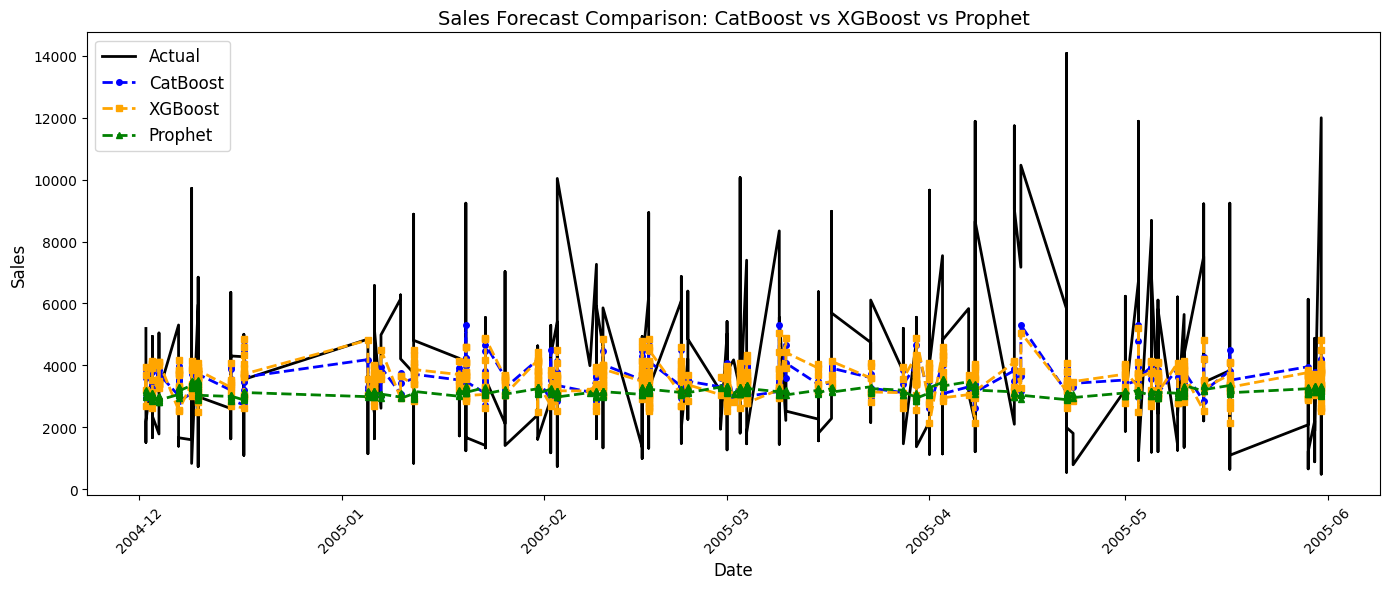

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from prophet import Prophet

# Load and prepare data
df_raw = pd.read_csv('/kaggle/input/sample-sales-data/sales_data_sample.csv', encoding='latin1')
df = df_raw[['ORDERDATE', 'SALES']].copy()
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
df = df.sort_values('ORDERDATE')
df['Sales_Lag_1'] = df['SALES'].shift(1)
df = df.dropna()

# Define features and target
feature_cols = ['Sales_Lag_1']
X = df[feature_cols]
y = df['SALES']

# Train/test split
split_idx = int(len(df) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]
dates_test = df['ORDERDATE'].iloc[split_idx:]

# --------- CatBoost ---------
cat_model = CatBoostRegressor(verbose=0, random_state=42)
cat_model.fit(X_train, y_train)
cat_pred = cat_model.predict(X_test)

# --------- XGBoost ---------
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# --------- Prophet ---------
prophet_df = df[['ORDERDATE', 'SALES']].rename(columns={'ORDERDATE': 'ds', 'SALES': 'y'})
prophet_df['y'] = np.log1p(prophet_df['y'])  # log transform
prophet = Prophet()
prophet.fit(prophet_df)
future = prophet.make_future_dataframe(periods=len(X_test), freq='D')
forecast = prophet.predict(future)
prophet_pred = np.expm1(forecast['yhat'].iloc[-len(X_test):].values)

# --------- Evaluation ---------
def evaluate(true, pred, name):
    mae = mean_absolute_error(true, pred)
    rmse = np.sqrt(mean_squared_error(true, pred))
    print(f'{name} → MAE: {mae:.2f}, RMSE: {rmse:.2f}')
    return mae, rmse

print("\nModel Evaluation:")
evaluate(y_test, cat_pred, 'CatBoost')
evaluate(y_test, xgb_pred, 'XGBoost')
evaluate(y_test, prophet_pred, 'Prophet')

# --------- Improved Plot Results ---------
plt.figure(figsize=(14, 6))

plt.plot(dates_test, y_test, label='Actual', color='black', linewidth=2)
plt.plot(dates_test, cat_pred, label='CatBoost', color='blue', linestyle='--', linewidth=2, marker='o', markersize=4)
plt.plot(dates_test, xgb_pred, label='XGBoost', color='orange', linestyle='--', linewidth=2, marker='s', markersize=4)
plt.plot(dates_test, prophet_pred, label='Prophet', color='green', linestyle='--', linewidth=2, marker='^', markersize=4)

plt.legend(fontsize=12)
plt.title('Sales Forecast Comparison: CatBoost vs XGBoost vs Prophet', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


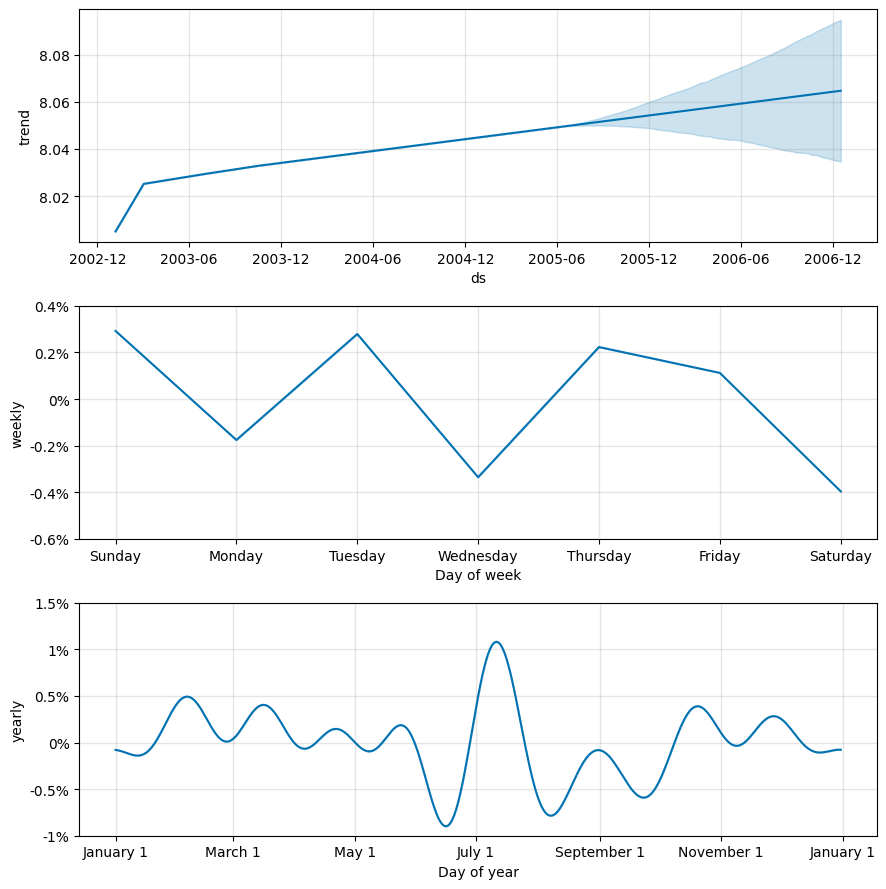

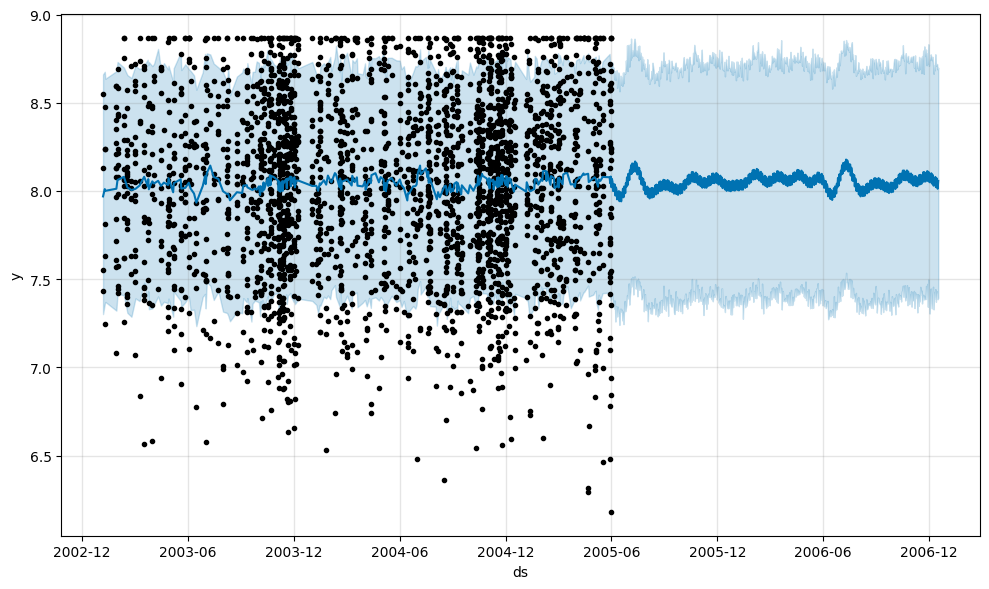

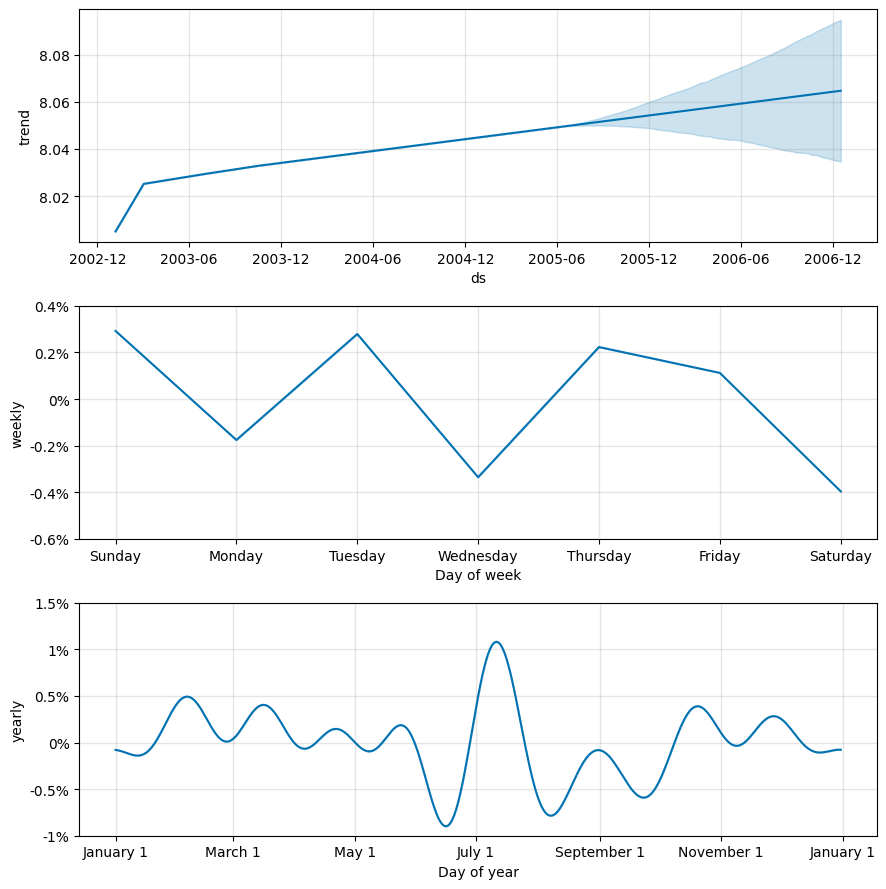

In [120]:
# Plot full forecast
model.plot(forecast)

# Plot decomposed components (TREND, SEASONALITY, HOLIDAYS)
model.plot_components(forecast)
